# Data Understanding


In [ ]:
# ===== 2. DATA UNDERSTANDING =====

# (Optionally) install needed libraries in Colab
# !pip install pandas numpy scikit-learn seaborn matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

# Path to your NYC Airbnb dataset in Google Drive (replace with your actual file path)
data_path = '/content/drive/MyDrive/AB_NYC_2019.csv'

# Load dataset
df = pd.read_csv(data_path)
print("Data loaded successfully!")

# Basic overview
print("Shape of the dataset:", df.shape)
df.head()


Mounted at /content/drive
Data loaded successfully!
Shape of the dataset: (48895, 16)


id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [ ]:
# Check data types, non-null counts, memory usage
df.info()

# Quick statistical summary for numeric columns
df.describe()

# Count missing values per column
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Exploratory Data Analysis






=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_revie

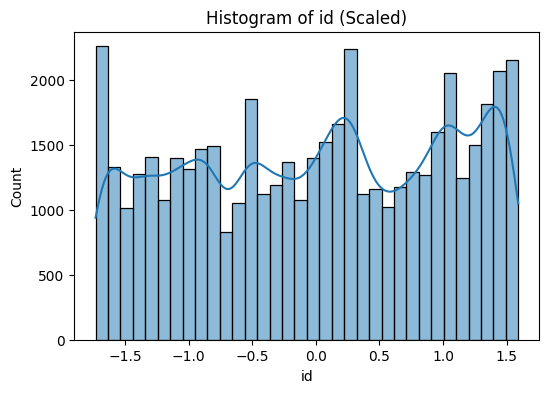

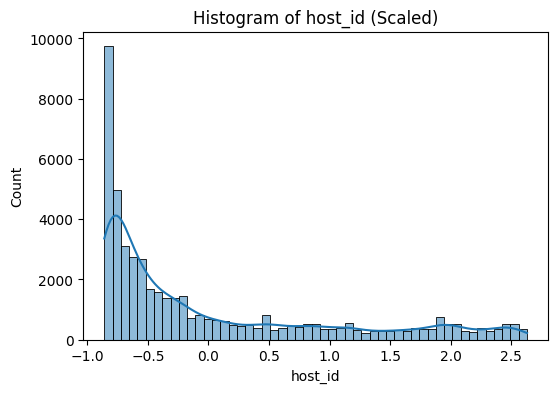

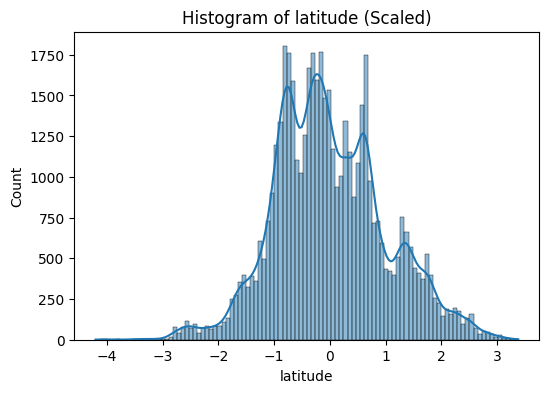

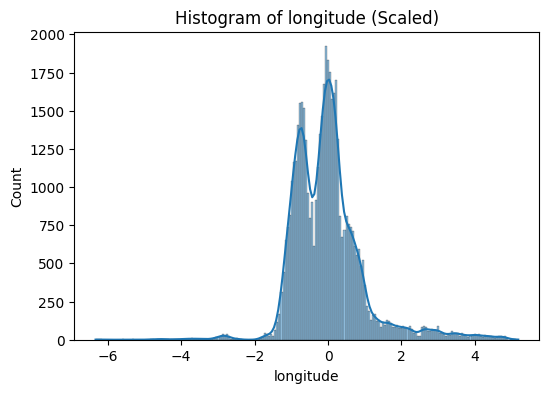

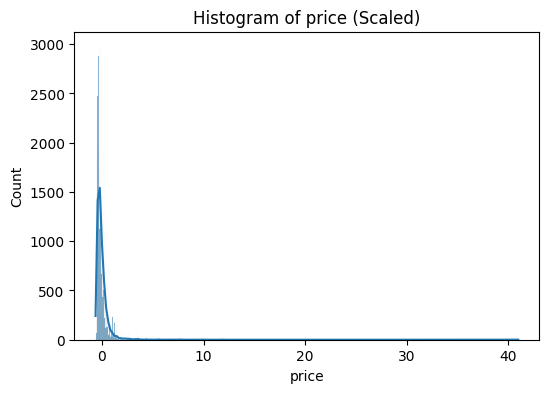

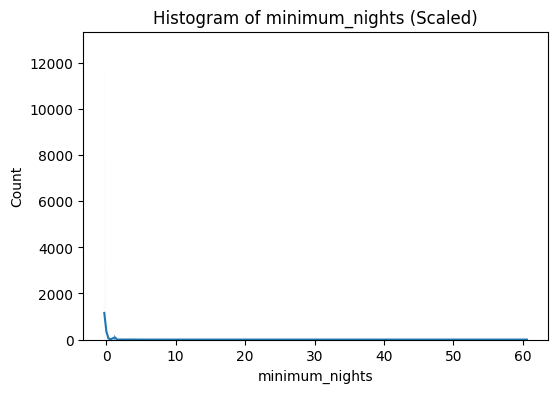

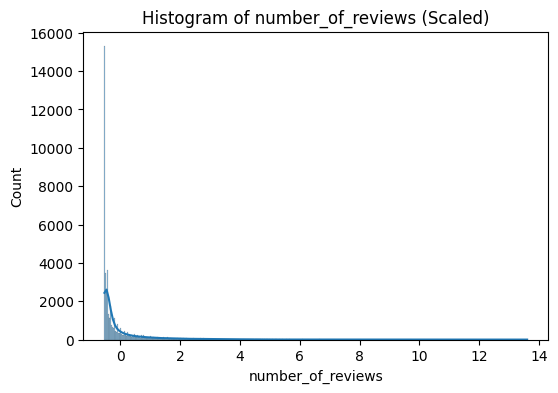

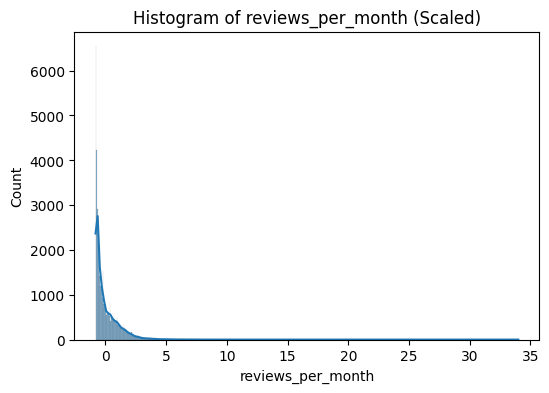

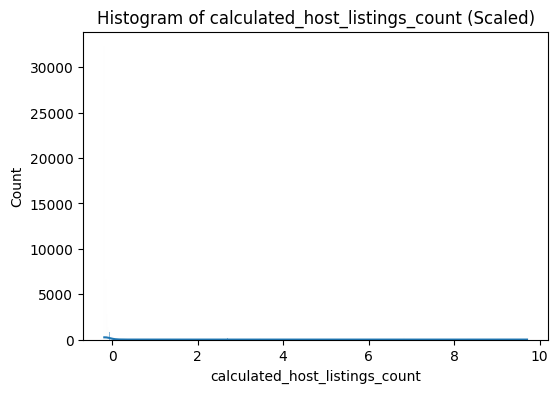

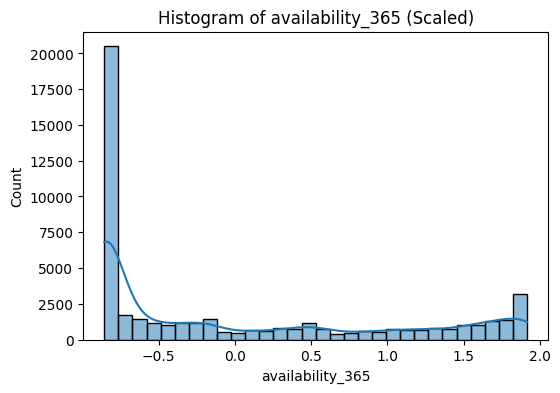

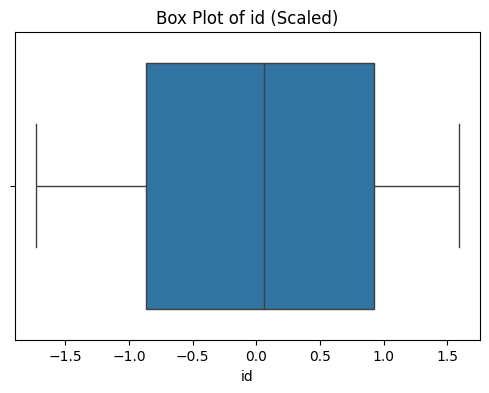

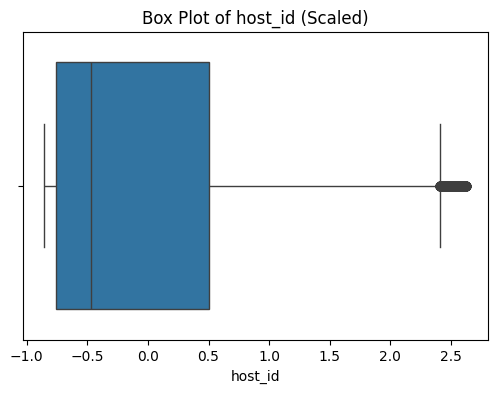

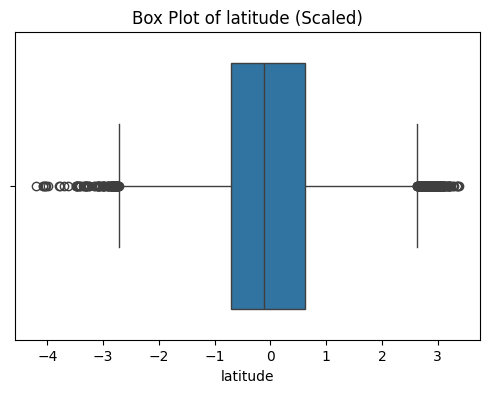

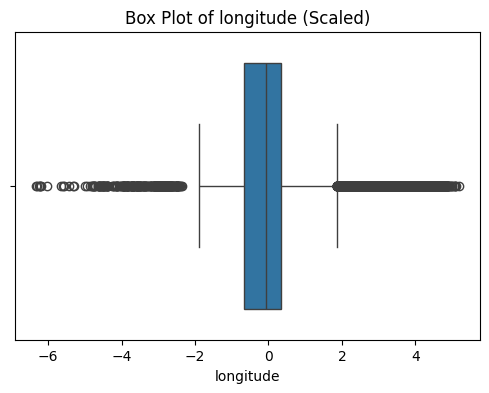

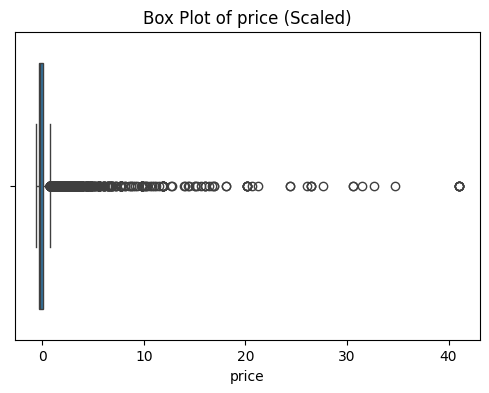

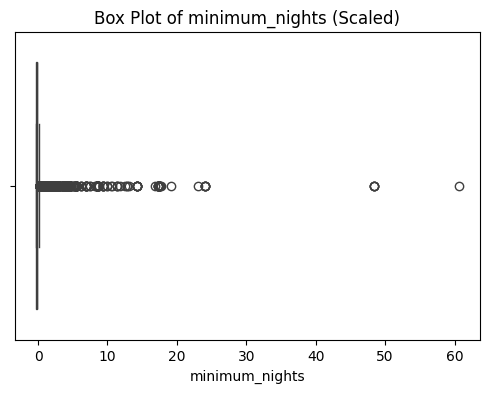

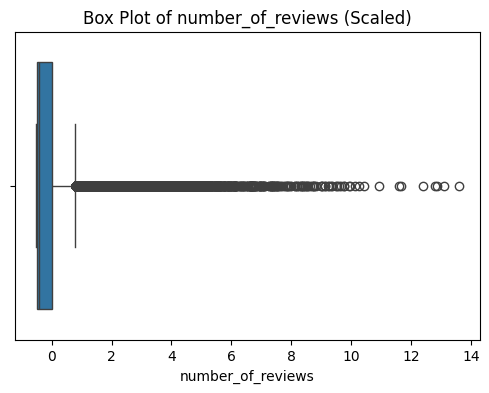

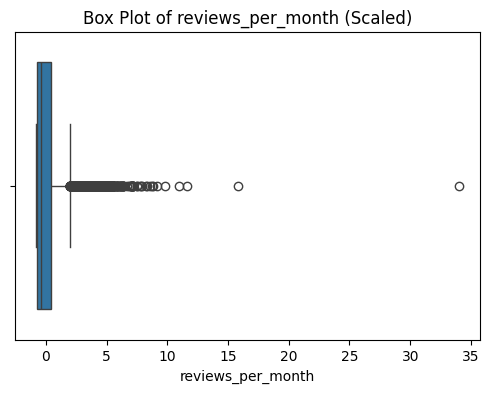

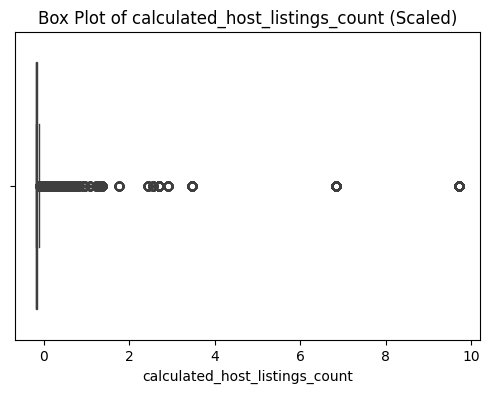

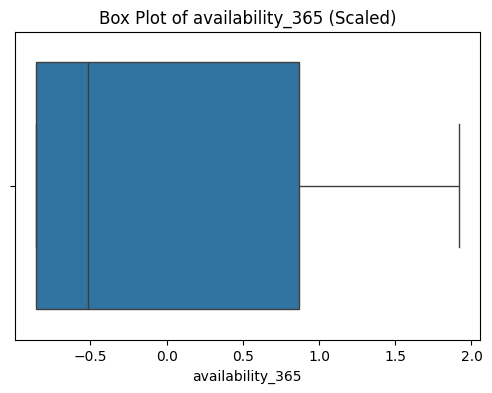

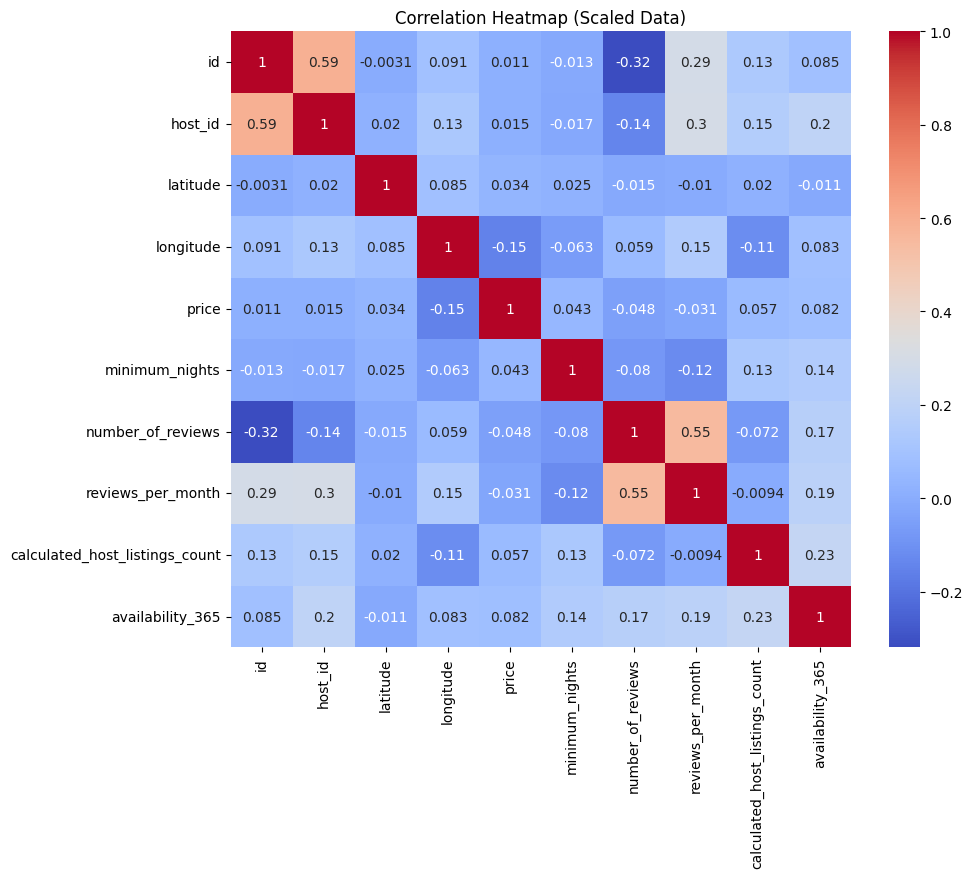


=== Outlier Detection & Capping ===
Column: host_id - Outliers capped: 1526, Bounds: [-141596552.00, 256853008.00]
Column: latitude - Outliers capped: 425, Bounds: [40.58, 40.87]
Column: longitude - Outliers capped: 2833, Bounds: [-74.05, -73.87]
Column: price - Outliers capped: 2972, Bounds: [-90.00, 334.00]
Column: minimum_nights - Outliers capped: 6607, Bounds: [-5.00, 11.00]
Column: number_of_reviews - Outliers capped: 6021, Bounds: [-33.50, 58.50]
Column: reviews_per_month - Outliers capped: 1793, Bounds: [-2.56, 4.77]
Column: calculated_host_listings_count - Outliers capped: 7081, Bounds: [-0.50, 3.50]

=== Post-Capping Visualizations ===


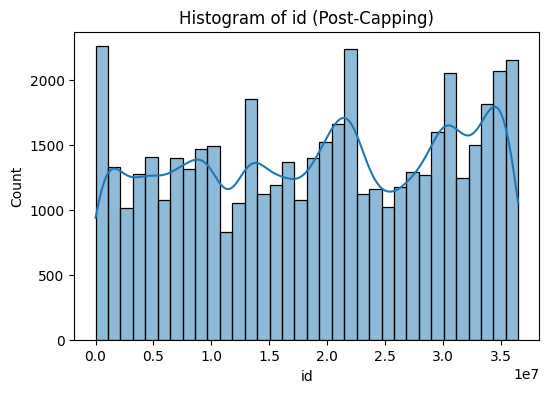

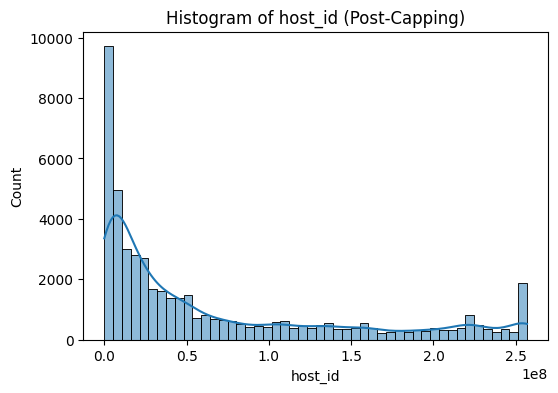

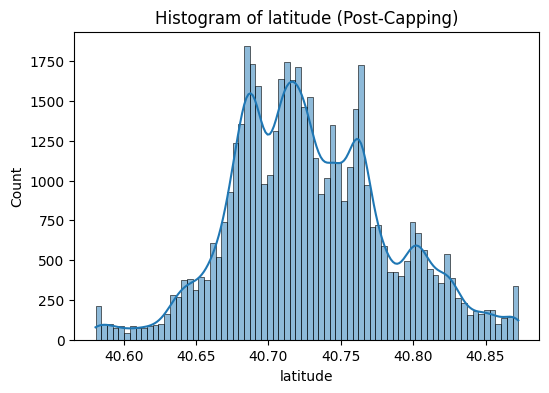

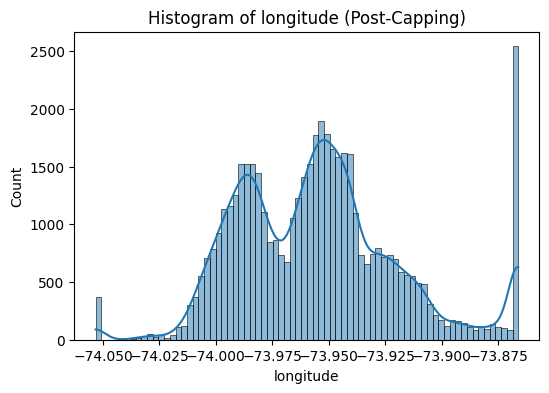

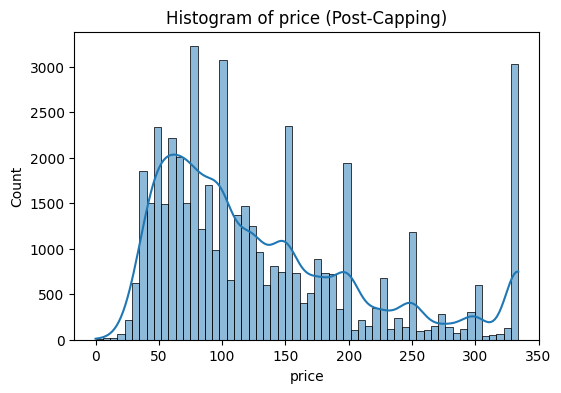

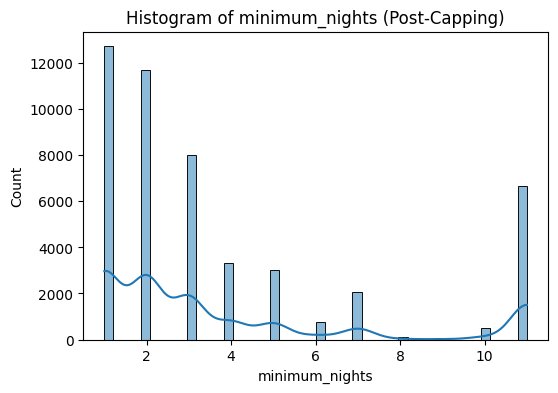

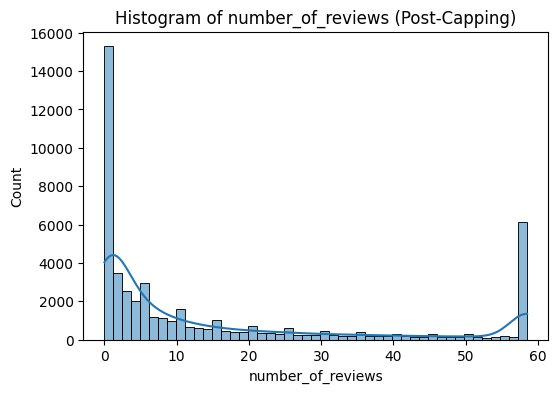

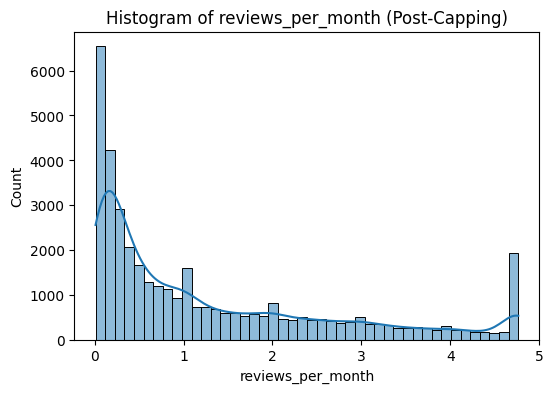

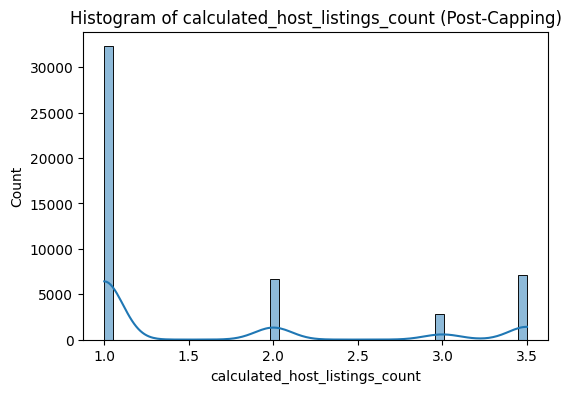

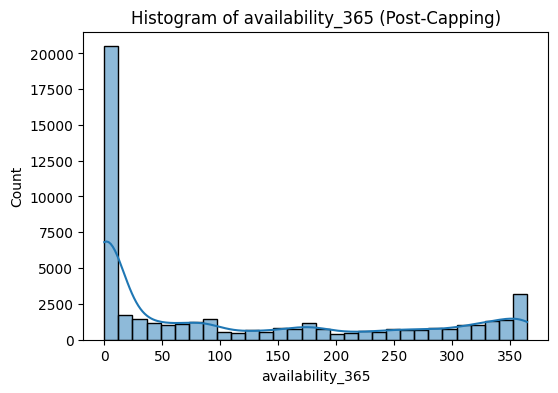

In [ ]:
# ===== BLOCK 2: EXPLORATORY DATA ANALYSIS (EDA) =====

# 2.1 Quick Info & Missing Values
print("\n=== Dataset Info ===")
df.info()

print("\n=== Missing Values ===")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# 2.2 Separate Numeric & Categorical
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\n=== Column Types ===")
print(f"Numeric columns: {numeric_cols}")
print(f"Categorical columns: {categorical_cols}")

# 2.3 Basic Stats for Numeric
print("\n=== Descriptive Statistics (Numeric) ===")
print(df[numeric_cols].describe())

# 2.4 Visualizations: Histograms & Box Plots
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Scale data for consistent comparison (StandardScaler)
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Histograms
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_scaled[col], kde=True)
    plt.title(f"Histogram of {col} (Scaled)")
    plt.show()

# Box Plots
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_scaled[col])
    plt.title(f"Box Plot of {col} (Scaled)")
    plt.show()

# 2.5 Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = df_scaled[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Scaled Data)")
plt.show()

# 2.6 Outlier Detection & Capping
def find_and_cap_outliers(dataframe, col):
    Q1 = dataframe[col].quantile(0.25)
    Q3 = dataframe[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = dataframe[(dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)]
    dataframe[col] = np.where(dataframe[col] < lower_bound, lower_bound, dataframe[col])
    dataframe[col] = np.where(dataframe[col] > upper_bound, upper_bound, dataframe[col])
    return len(outliers), lower_bound, upper_bound

print("\n=== Outlier Detection & Capping ===")
for col in numeric_cols:
    outliers_count, lb, ub = find_and_cap_outliers(df, col)
    if outliers_count > 0:
        print(f"Column: {col} - Outliers capped: {outliers_count}, Bounds: [{lb:.2f}, {ub:.2f}]")

# 2.7 Post-Capping Visualizations
print("\n=== Post-Capping Visualizations ===")
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col} (Post-Capping)")
    plt.show()


# Data Preprocessing & Quality Enhancement





In [ ]:
# ===== BLOCK 3: DATA CLEANING & FEATURE ENGINEERING =====

from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 3.1 Handle Remaining Missing Values
print("=== Handling Missing Values ===")
print("Missing values before cleaning:\n", df.isnull().sum())

for col in numeric_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

print("\nMissing values after cleaning:\n", df.isnull().sum())

# 3.2 Remove Duplicates
dupe_count = df.duplicated().sum()
print(f"\nNumber of duplicates: {dupe_count}")
if dupe_count > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates removed. New shape:", df.shape)

# 3.3 Handle High Cardinality in Categorical Columns (Optional)
def limit_categories(df_, col, max_cat=50):
    top_cats = df_[col].value_counts().index[:max_cat]
    df_[col] = df_[col].apply(lambda x: x if x in top_cats else "Other")

for col in categorical_cols:
    limit_categories(df, col, max_cat=50)

# 3.4 Outlier Detection & Capping (Reused from EDA)
def cap_outliers(dataframe, col):
    Q1 = dataframe[col].quantile(0.25)
    Q3 = dataframe[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    dataframe[col] = np.where(dataframe[col] < lower_bound, lower_bound, dataframe[col])
    dataframe[col] = np.where(dataframe[col] > upper_bound, upper_bound, dataframe[col])

print("\n=== Outlier Capping ===")
for col in numeric_cols:
    cap_outliers(df, col)
    print(f"Outliers capped for column: {col}")

# 3.5 Feature Scaling
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Create scaled versions for numeric columns
df_scaled_standard = df.copy()
df_scaled_standard[numeric_cols] = scaler_standard.fit_transform(df[numeric_cols])

df_scaled_minmax = df.copy()
df_scaled_minmax[numeric_cols] = scaler_minmax.fit_transform(df[numeric_cols])

print("\nFeature Scaling applied (StandardScaler and MinMaxScaler versions created).")

# 3.6 Feature Engineering (Example)
print("\n=== Feature Engineering ===")
if 'price' in df.columns and 'number_of_reviews' in df.columns:
    df['price_per_review'] = df['price'] / (df['number_of_reviews'] + 1)
    print("New feature 'price_per_review' created.")

if 'availability_365' in df.columns and 'reviews_per_month' in df.columns:
    df['availability_ratio'] = df['reviews_per_month'] / (df['availability_365'] + 1)
    print("New feature 'availability_ratio' created.")

# Post-cleaning validation
print("\n=== Post-Cleaning Validation ===")
df.info()
print("\nDescriptive Statistics After Cleaning:\n", df.describe())


=== Handling Missing Values ===
Missing values before cleaning:
 id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Missing values after cleaning:
 id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                         

<ipython-input-4-796a39357fb3>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
<ipython-input-4-796a39357fb3>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me


=== Outlier Capping ===
Outliers capped for column: id
Outliers capped for column: host_id
Outliers capped for column: latitude
Outliers capped for column: longitude
Outliers capped for column: price
Outliers capped for column: minimum_nights
Outliers capped for column: number_of_reviews
Outliers capped for column: reviews_per_month
Outliers capped for column: calculated_host_listings_count
Outliers capped for column: availability_365

Feature Scaling applied (StandardScaler and MinMaxScaler versions created).

=== Feature Engineering ===
New feature 'price_per_review' created.
New feature 'availability_ratio' created.

=== Post-Cleaning Validation ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  float64
 1   name                            48895 non

# Train/Test Split & Basic Preprocessing





In [ ]:
# ===== BLOCK 4: TRAIN/TEST SPLIT & PREPROCESSING =====

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# 4.1 Define Target and Features
target = 'price'  # Adjust if needed
feature_cols = [c for c in df.columns if c != target]
X = df[feature_cols].copy()
y = df[target].values

print("X shape:", X.shape, "| y shape:", y.shape)

# 4.2 Split Data into Train/Test
X_train_df, X_test_df, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Re-check Numeric and Categorical Columns After Feature Engineering
numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# 4.3 Preprocess Numeric Features
num_imputer = SimpleImputer(strategy='median')  # Fill missing numeric values with median
scaler = StandardScaler()  # Scale numeric features

X_train_num = num_imputer.fit_transform(X_train_df[numeric_features])
X_train_num = scaler.fit_transform(X_train_num)

X_test_num = num_imputer.transform(X_test_df[numeric_features])
X_test_num = scaler.transform(X_test_num)

# 4.4 Preprocess Categorical Features
cat_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=True)  # Use sparse matrices
X_train_cat = cat_encoder.fit_transform(X_train_df[categorical_features])
X_test_cat = cat_encoder.transform(X_test_df[categorical_features])

# 4.5 Combine Numeric and Categorical Features
from scipy.sparse import hstack  # Efficiently combine sparse and dense data

X_train_processed = hstack([X_train_num, X_train_cat])
X_test_processed = hstack([X_test_num, X_test_cat])

print("X_train_processed shape:", X_train_processed.shape)
print("X_test_processed shape:", X_test_processed.shape)

# Validate Processed Data
print("No NaN in X_train_processed:", not np.any(np.isnan(X_train_processed.toarray())))
print("No NaN in X_test_processed:", not np.any(np.isnan(X_test_processed.toarray())))


X shape: (48895, 17) | y shape: (48895,)
X_train_processed shape: (39116, 223)
X_test_processed shape: (9779, 223)
No NaN in X_train_processed: True
No NaN in X_test_processed: True


# Regression Models


=== Linear Regression ===
Intercept: 106.3803130894517

Coefficients:
                    Feature  Coefficient
0                        id    -1.795491
1                   host_id     2.092572
2                  latitude     3.757846
3                 longitude   -10.995935
4            minimum_nights    -8.377551
..                      ...          ...
218  last_review_2019-07-04    -8.137981
219  last_review_2019-07-05    -4.383033
220  last_review_2019-07-06    -0.568617
221  last_review_2019-07-07    -2.181495
222       last_review_Other    -0.574240

[223 rows x 2 columns]

Training Metrics:
  RMSE: 48.86
  MAE: 35.34
  R^2: 0.66

Test Metrics:
  RMSE: 48.34
  MAE: 34.81
  R^2: 0.66


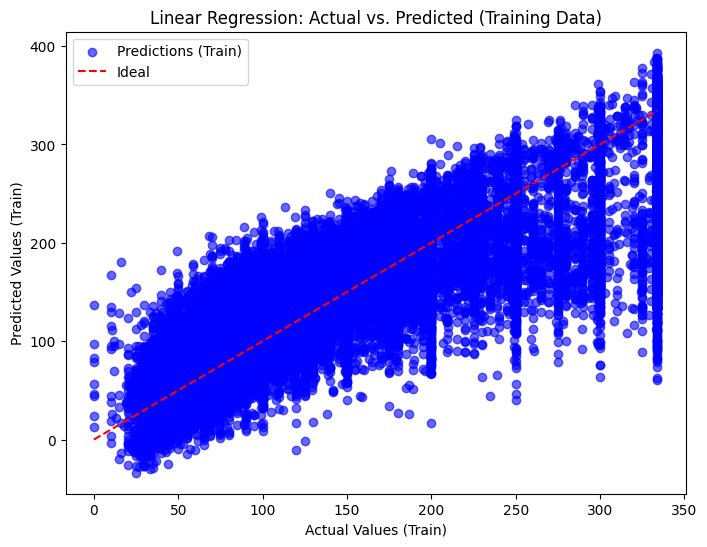

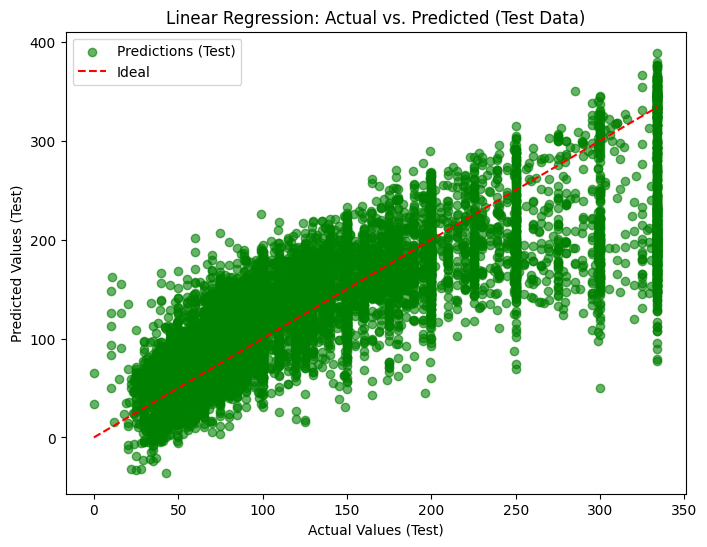

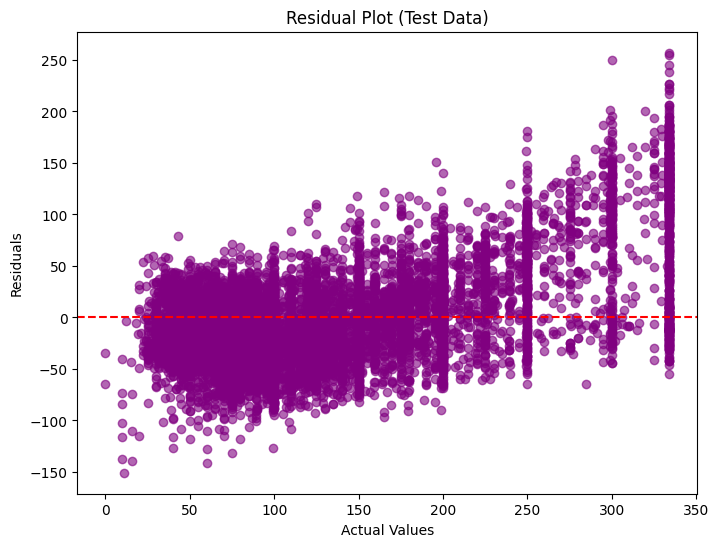

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Train Linear Regression (Use preprocessed data directly)
lin_reg = LinearRegression()
lin_reg.fit(X_train_processed, y_train)

# Print model coefficients
print("\n=== Linear Regression ===")
print("Intercept:", lin_reg.intercept_)

# Print coefficients with feature names (if available)
feature_names = numeric_features + list(cat_encoder.get_feature_names_out(categorical_features))
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lin_reg.coef_
})
print("\nCoefficients:")
print(coefficients)

# Predictions
y_train_pred_lin = lin_reg.predict(X_train_processed)
y_test_pred_lin = lin_reg.predict(X_test_processed)

# Evaluate Performance on Training Data
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_lin))
train_mae = mean_absolute_error(y_train, y_train_pred_lin)
train_r2 = r2_score(y_train, y_train_pred_lin)
print("\nTraining Metrics:")
print(f"  RMSE: {train_rmse:.2f}")
print(f"  MAE: {train_mae:.2f}")
print(f"  R^2: {train_r2:.2f}")

# Evaluate Performance on Test Data
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lin))
test_mae = mean_absolute_error(y_test, y_test_pred_lin)
test_r2 = r2_score(y_test, y_test_pred_lin)
print("\nTest Metrics:")
print(f"  RMSE: {test_rmse:.2f}")
print(f"  MAE: {test_mae:.2f}")
print(f"  R^2: {test_r2:.2f}")

# Visualization: Training Data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred_lin, alpha=0.6, color='blue', label='Predictions (Train)')
plt.xlabel("Actual Values (Train)")
plt.ylabel("Predicted Values (Train)")
plt.title("Linear Regression: Actual vs. Predicted (Training Data)")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--r', label="Ideal")
plt.legend()
plt.show()

# Visualization: Test Data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_lin, alpha=0.6, color='green', label='Predictions (Test)')
plt.xlabel("Actual Values (Test)")
plt.ylabel("Predicted Values (Test)")
plt.title("Linear Regression: Actual vs. Predicted (Test Data)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', label="Ideal")
plt.legend()
plt.show()

# Residual Plot for Test Data
plt.figure(figsize=(8, 6))
residuals = y_test - y_test_pred_lin
plt.scatter(y_test, residuals, alpha=0.6, color='purple')
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Test Data)")
plt.show()



=== Ridge Regression ===
Intercept: 106.68953279267541

Coefficients:
                    Feature  Coefficient
0                        id    -1.799278
1                   host_id     2.091034
2                  latitude     3.677670
3                 longitude   -11.029857
4            minimum_nights    -8.386387
..                      ...          ...
218  last_review_2019-07-04    -8.052626
219  last_review_2019-07-05    -4.290255
220  last_review_2019-07-06    -0.534074
221  last_review_2019-07-07    -2.242993
222       last_review_Other    -0.574359

[223 rows x 2 columns]

Training Metrics:
  RMSE: 48.86
  MAE: 35.34
  R^2: 0.66

Test Metrics:
  RMSE: 48.33
  MAE: 34.80
  R^2: 0.66


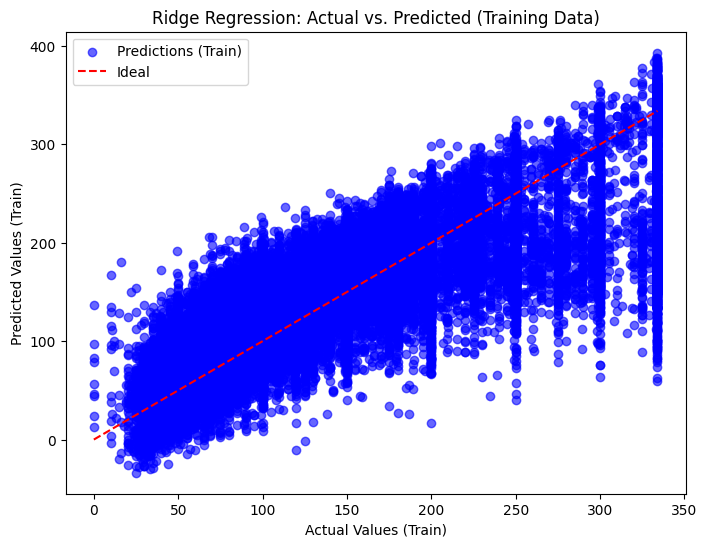

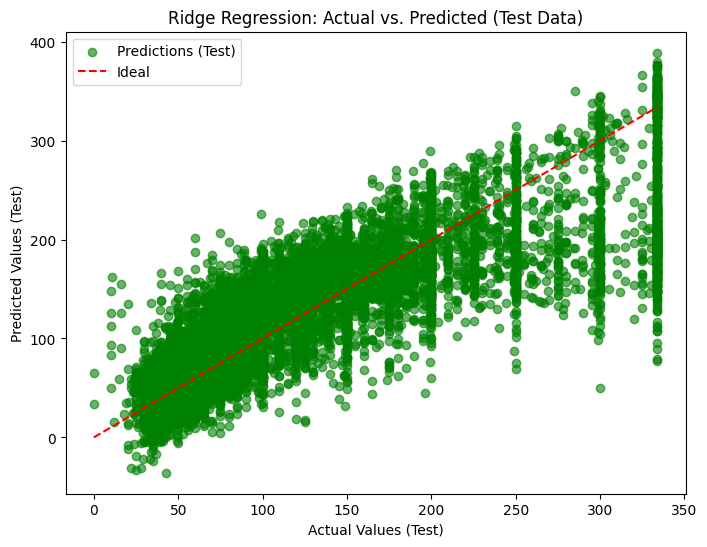

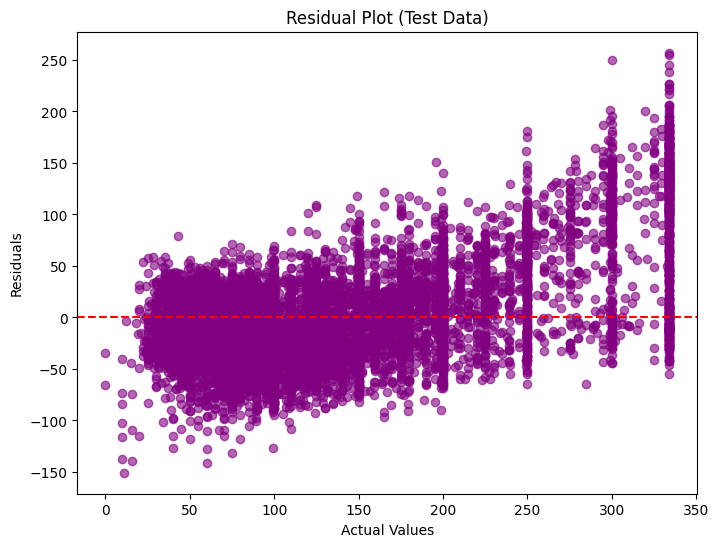

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Train Ridge Regression
ridge_reg = Ridge(alpha=1.0)  # Adjust alpha as needed
ridge_reg.fit(X_train_processed, y_train)

# Print model coefficients
print("\n=== Ridge Regression ===")
print("Intercept:", ridge_reg.intercept_)

# Print coefficients with feature names
feature_names = numeric_features + list(cat_encoder.get_feature_names_out(categorical_features))
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': ridge_reg.coef_
})
print("\nCoefficients:")
print(coefficients)

# Predictions
y_train_pred_ridge = ridge_reg.predict(X_train_processed)
y_test_pred_ridge = ridge_reg.predict(X_test_processed)

# Evaluate Performance on Training Data
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
train_mae = mean_absolute_error(y_train, y_train_pred_ridge)
train_r2 = r2_score(y_train, y_train_pred_ridge)
print("\nTraining Metrics:")
print(f"  RMSE: {train_rmse:.2f}")
print(f"  MAE: {train_mae:.2f}")
print(f"  R^2: {train_r2:.2f}")

# Evaluate Performance on Test Data
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
test_mae = mean_absolute_error(y_test, y_test_pred_ridge)
test_r2 = r2_score(y_test, y_test_pred_ridge)
print("\nTest Metrics:")
print(f"  RMSE: {test_rmse:.2f}")
print(f"  MAE: {test_mae:.2f}")
print(f"  R^2: {test_r2:.2f}")

# Visualization: Training Data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred_ridge, alpha=0.6, color='blue', label='Predictions (Train)')
plt.xlabel("Actual Values (Train)")
plt.ylabel("Predicted Values (Train)")
plt.title("Ridge Regression: Actual vs. Predicted (Training Data)")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--r', label="Ideal")
plt.legend()
plt.show()

# Visualization: Test Data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_ridge, alpha=0.6, color='green', label='Predictions (Test)')
plt.xlabel("Actual Values (Test)")
plt.ylabel("Predicted Values (Test)")
plt.title("Ridge Regression: Actual vs. Predicted (Test Data)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', label="Ideal")
plt.legend()
plt.show()

# Residual Plot for Test Data
plt.figure(figsize=(8, 6))
residuals = y_test - y_test_pred_ridge
plt.scatter(y_test, residuals, alpha=0.6, color='purple')
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Test Data)")
plt.show()



=== Lasso Regression ===
Intercept: 102.36912017940706

Coefficients:
                    Feature  Coefficient
0                        id    -1.474172
1                   host_id     1.839914
2                  latitude     0.147611
3                 longitude   -11.863021
4            minimum_nights    -8.593024
..                      ...          ...
218  last_review_2019-07-04    -0.000000
219  last_review_2019-07-05    -0.000000
220  last_review_2019-07-06     0.000000
221  last_review_2019-07-07    -0.000000
222       last_review_Other    -0.645282

[223 rows x 2 columns]

Training Metrics:
  RMSE: 49.40
  MAE: 35.66
  R^2: 0.65

Test Metrics:
  RMSE: 48.72
  MAE: 34.99
  R^2: 0.65


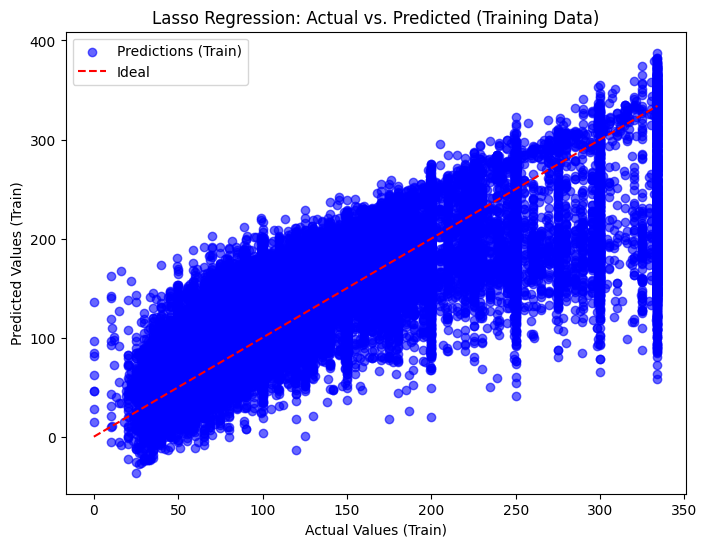

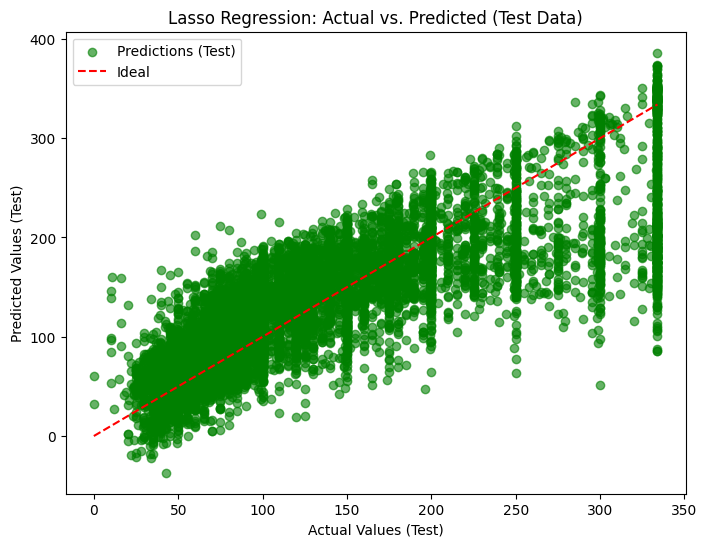

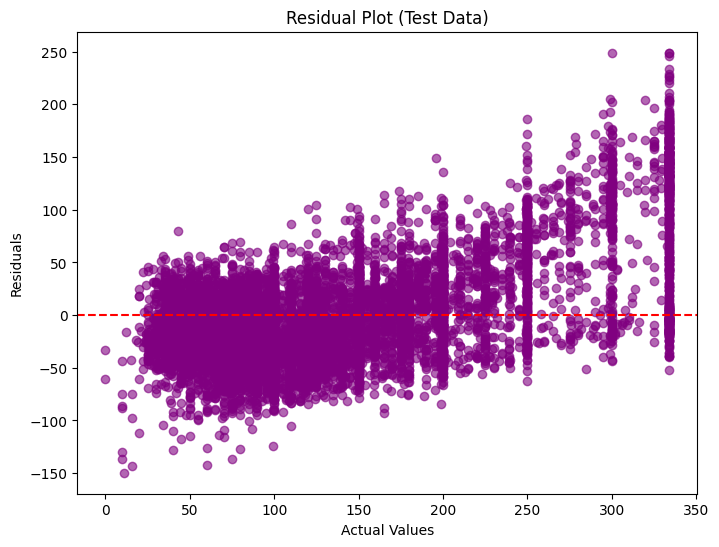

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Train Lasso Regression
lasso_reg = Lasso(alpha=0.1, max_iter=10000)  # Adjust alpha as needed
lasso_reg.fit(X_train_processed, y_train)

# Print model coefficients
print("\n=== Lasso Regression ===")
print("Intercept:", lasso_reg.intercept_)

# Print coefficients with feature names
feature_names = numeric_features + list(cat_encoder.get_feature_names_out(categorical_features))
coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_reg.coef_
})
print("\nCoefficients:")
print(coefficients)

# Predictions
y_train_pred_lasso = lasso_reg.predict(X_train_processed)
y_test_pred_lasso = lasso_reg.predict(X_test_processed)

# Evaluate Performance on Training Data
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
train_mae = mean_absolute_error(y_train, y_train_pred_lasso)
train_r2 = r2_score(y_train, y_train_pred_lasso)
print("\nTraining Metrics:")
print(f"  RMSE: {train_rmse:.2f}")
print(f"  MAE: {train_mae:.2f}")
print(f"  R^2: {train_r2:.2f}")

# Evaluate Performance on Test Data
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))
test_mae = mean_absolute_error(y_test, y_test_pred_lasso)
test_r2 = r2_score(y_test, y_test_pred_lasso)
print("\nTest Metrics:")
print(f"  RMSE: {test_rmse:.2f}")
print(f"  MAE: {test_mae:.2f}")
print(f"  R^2: {test_r2:.2f}")

# Visualization: Training Data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred_lasso, alpha=0.6, color='blue', label='Predictions (Train)')
plt.xlabel("Actual Values (Train)")
plt.ylabel("Predicted Values (Train)")
plt.title("Lasso Regression: Actual vs. Predicted (Training Data)")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--r', label="Ideal")
plt.legend()
plt.show()

# Visualization: Test Data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_lasso, alpha=0.6, color='green', label='Predictions (Test)')
plt.xlabel("Actual Values (Test)")
plt.ylabel("Predicted Values (Test)")
plt.title("Lasso Regression: Actual vs. Predicted (Test Data)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', label="Ideal")
plt.legend()
plt.show()

# Residual Plot for Test Data
plt.figure(figsize=(8, 6))
residuals = y_test - y_test_pred_lasso
plt.scatter(y_test, residuals, alpha=0.6, color='purple')
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Test Data)")
plt.show()



Training Metrics:
  RMSE: 38.83
  MAE: 24.16
  R^2: 0.78

Test Metrics:
  RMSE: 39.73
  MAE: 24.83
  R^2: 0.77


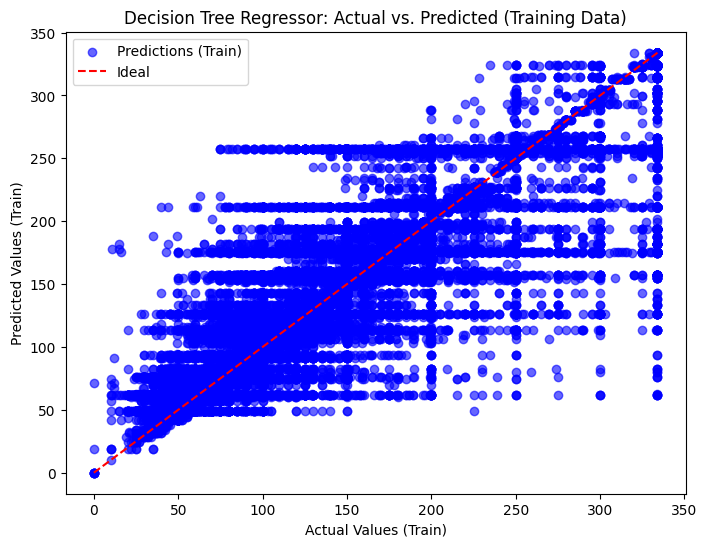

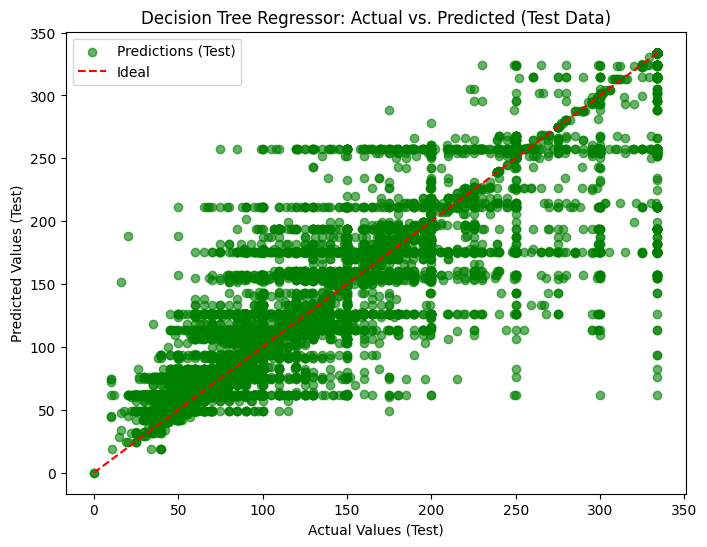


Feature Importances:
                       Feature  Importance
169  room_type_Entire home/apt    0.439343
9             price_per_review    0.339159
5            number_of_reviews    0.072111
3                    longitude    0.050275
2                     latitude    0.025541
..                         ...         ...
82              host_name_John    0.000000
83          host_name_Jonathan    0.000000
84            host_name_Joseph    0.000000
85              host_name_Kara    0.000000
222          last_review_Other    0.000000

[223 rows x 2 columns]


<ipython-input-9-e0b862aa9b51>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


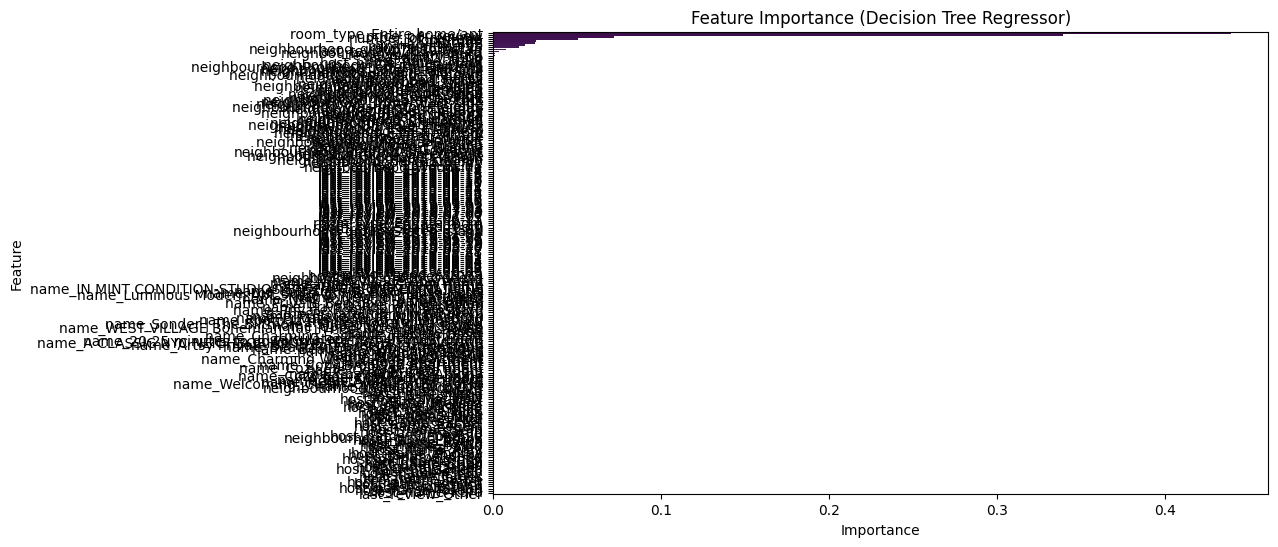

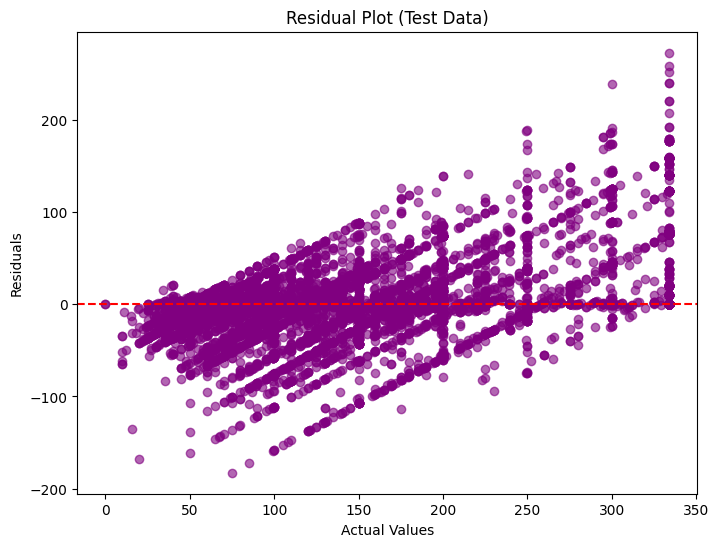

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Train the Decision Tree Regressor
tree_reg = DecisionTreeRegressor(max_depth=10, min_samples_split=50, random_state=42)
tree_reg.fit(X_train_processed, y_train)

# Predictions
y_train_pred_tree = tree_reg.predict(X_train_processed)
y_test_pred_tree = tree_reg.predict(X_test_processed)

# Evaluate Performance on Training Data
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_tree))
train_mae = mean_absolute_error(y_train, y_train_pred_tree)
train_r2 = r2_score(y_train, y_train_pred_tree)
print("\nTraining Metrics:")
print(f"  RMSE: {train_rmse:.2f}")
print(f"  MAE: {train_mae:.2f}")
print(f"  R^2: {train_r2:.2f}")

# Evaluate Performance on Test Data
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))
test_mae = mean_absolute_error(y_test, y_test_pred_tree)
test_r2 = r2_score(y_test, y_test_pred_tree)
print("\nTest Metrics:")
print(f"  RMSE: {test_rmse:.2f}")
print(f"  MAE: {test_mae:.2f}")
print(f"  R^2: {test_r2:.2f}")

# Visualization: Training Data
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred_tree, alpha=0.6, color='blue', label='Predictions (Train)')
plt.xlabel("Actual Values (Train)")
plt.ylabel("Predicted Values (Train)")
plt.title("Decision Tree Regressor: Actual vs. Predicted (Training Data)")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], '--r', label="Ideal")
plt.legend()
plt.show()

# Visualization: Test Data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred_tree, alpha=0.6, color='green', label='Predictions (Test)')
plt.xlabel("Actual Values (Test)")
plt.ylabel("Predicted Values (Test)")
plt.title("Decision Tree Regressor: Actual vs. Predicted (Test Data)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', label="Ideal")
plt.legend()
plt.show()

# Feature Importance
importances = tree_reg.feature_importances_
feature_names = numeric_features + list(cat_encoder.get_feature_names_out(categorical_features))
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title("Feature Importance (Decision Tree Regressor)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# Residual Plot for Test Data
plt.figure(figsize=(8, 6))
residuals = y_test - y_test_pred_tree
plt.scatter(y_test, residuals, alpha=0.6, color='purple')
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Test Data)")
plt.show()


# Clustering


In [ ]:
pip install kneed


=== Clustering on Columns: ['price'] ===


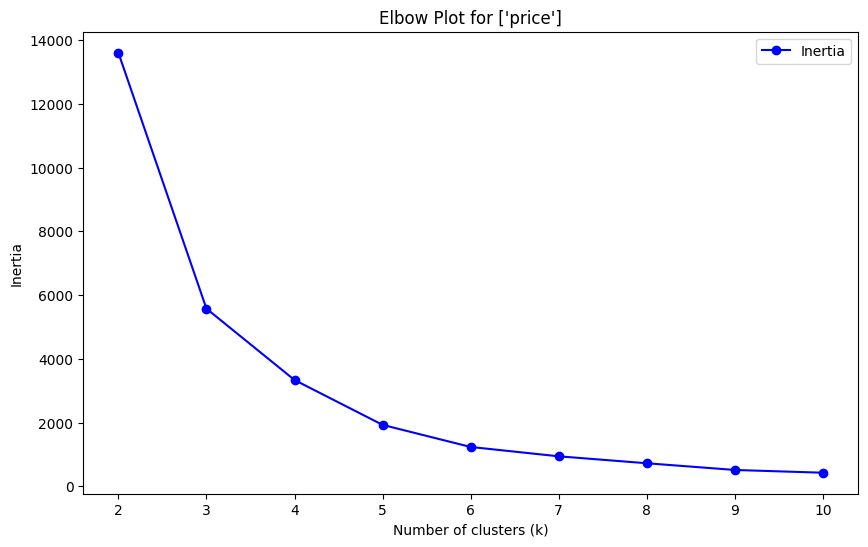

Optimal k (from elbow method): 4


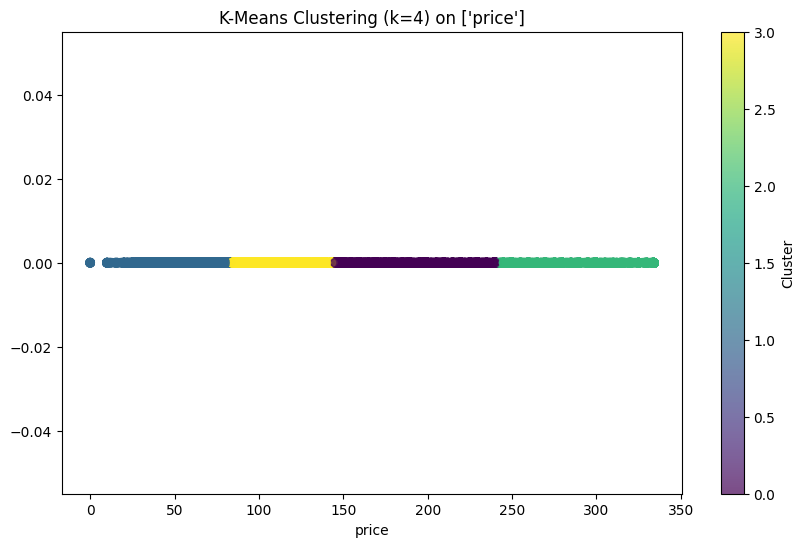


=== Clustering on Columns: ['minimum_nights'] ===


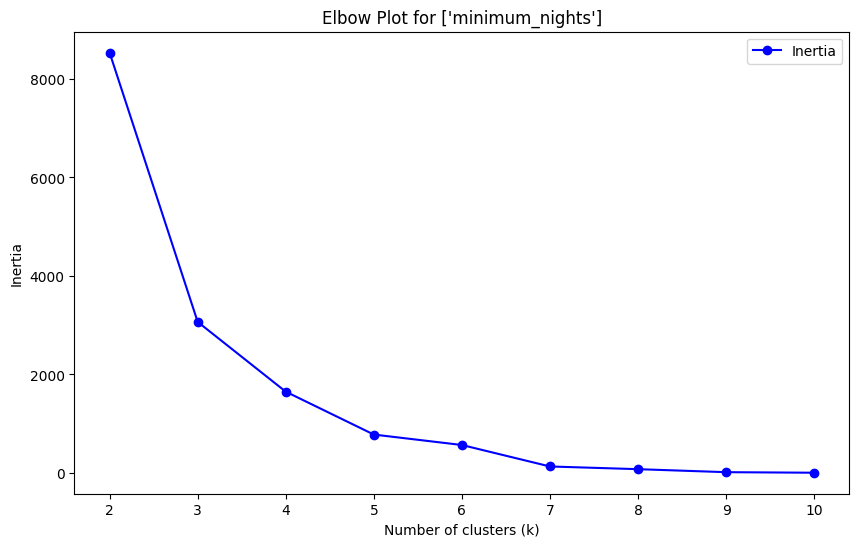

Optimal k (from elbow method): 4


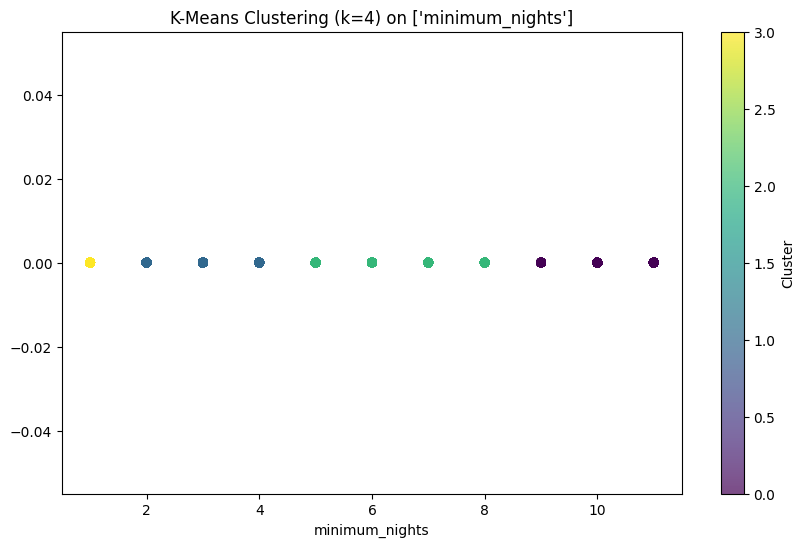


=== Clustering on Columns: ['availability_365'] ===


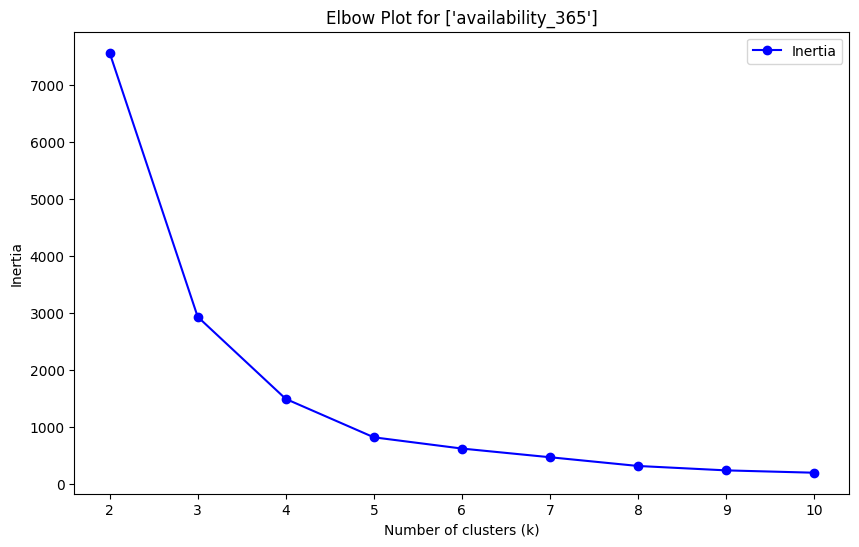

Optimal k (from elbow method): 4


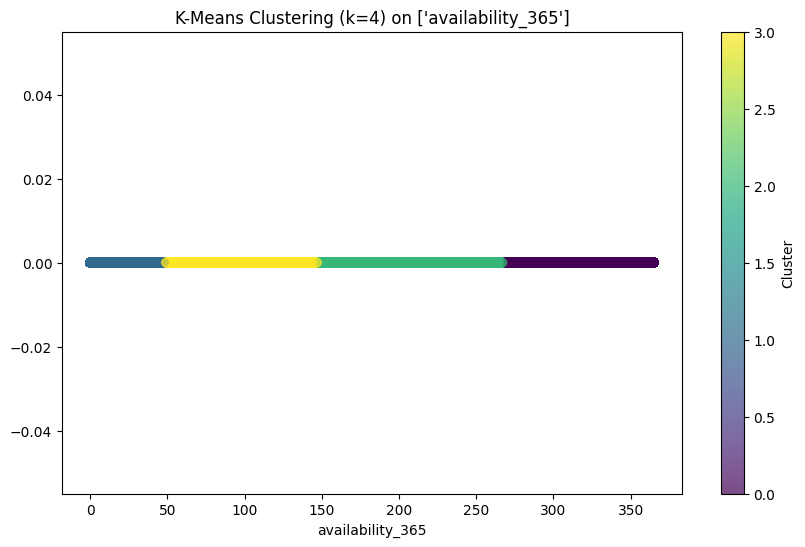


=== Clustering on Columns: ['price', 'minimum_nights'] ===


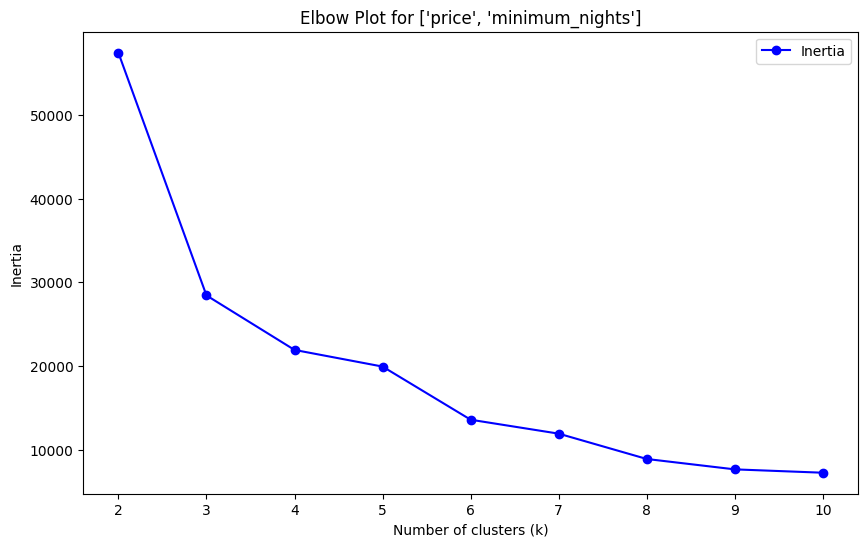

Optimal k (from elbow method): 6


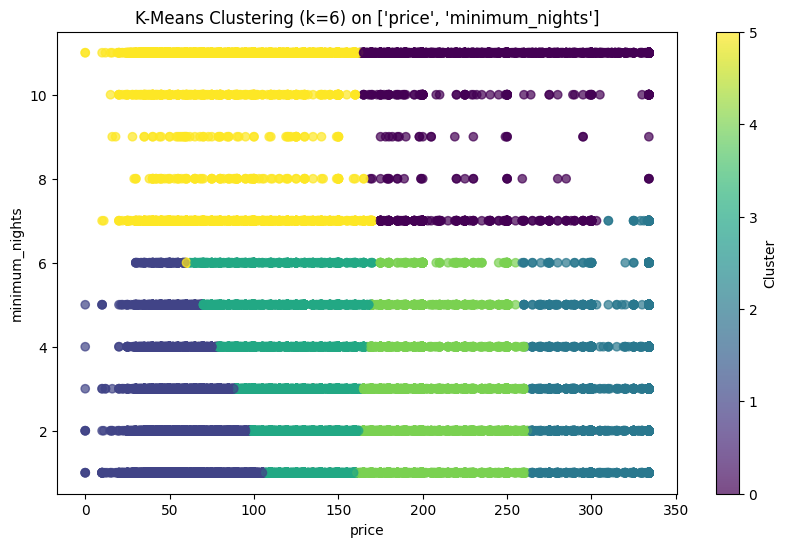


=== Clustering on Columns: ['price', 'availability_365'] ===


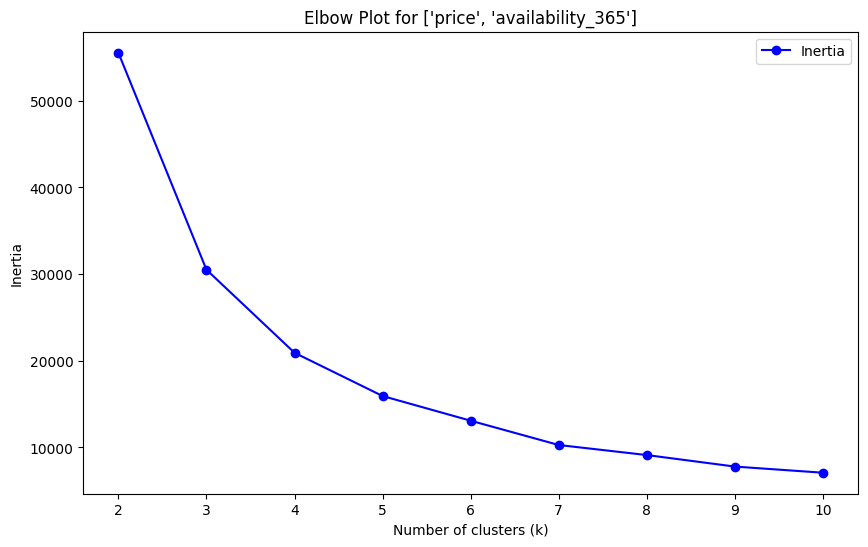

Optimal k (from elbow method): 4


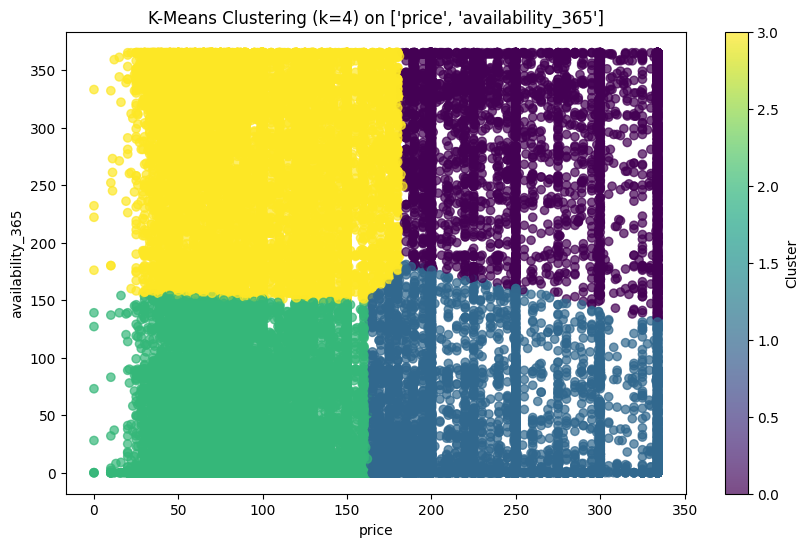


=== Clustering on Columns: ['minimum_nights', 'availability_365'] ===


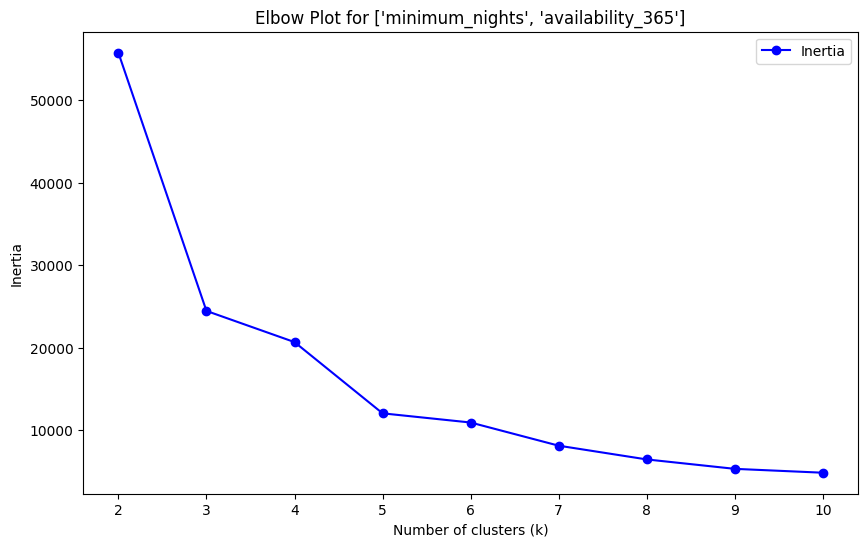

Optimal k (from elbow method): 5


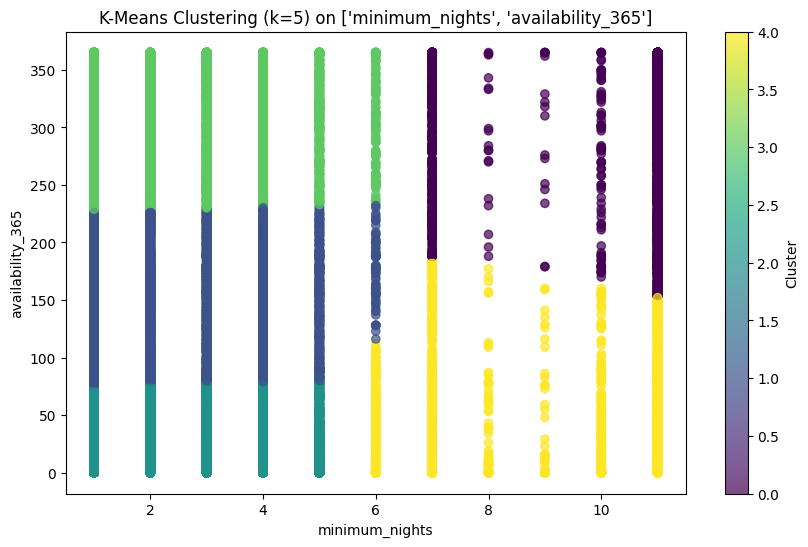


=== Clustering on Columns: ['price', 'minimum_nights', 'availability_365'] ===


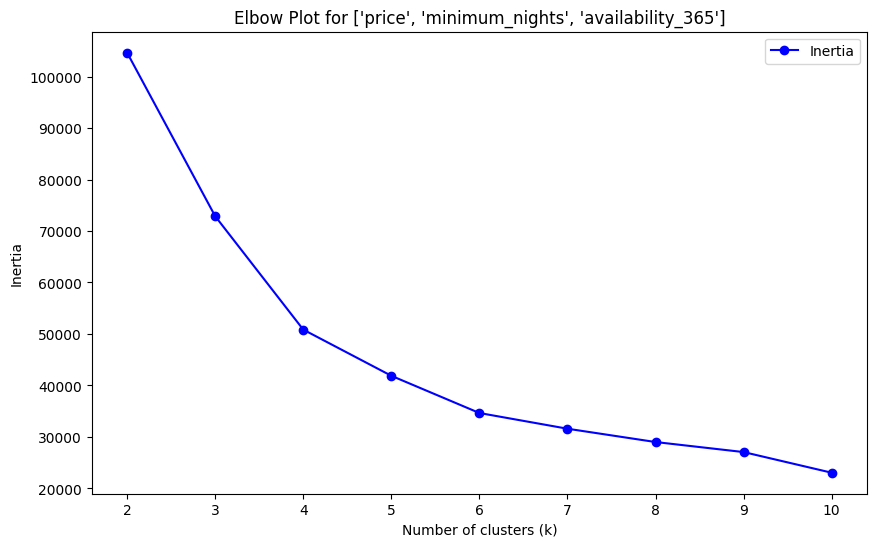

Optimal k (from elbow method): 4

=== Results for ('price',) ===
Optimal k: 4
Silhouette Score: 0.577

=== Results for ('minimum_nights',) ===
Optimal k: 4
Silhouette Score: 0.698

=== Results for ('availability_365',) ===
Optimal k: 4
Silhouette Score: 0.734

=== Results for ('price', 'minimum_nights') ===
Optimal k: 6
Silhouette Score: 0.398

=== Results for ('price', 'availability_365') ===
Optimal k: 4
Silhouette Score: 0.515

=== Results for ('minimum_nights', 'availability_365') ===
Optimal k: 5
Silhouette Score: 0.522

=== Results for ('price', 'minimum_nights', 'availability_365') ===
Optimal k: 4
Silhouette Score: 0.423


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator  # Install using pip install kneed

# Define the columns to use for clustering
columns_to_cluster = [
    ['price'],  # Single column
    ['minimum_nights'],  # Single column
    ['availability_365'],  # Single column
    ['price', 'minimum_nights'],  # Combination
    ['price', 'availability_365'],  # Combination
    ['minimum_nights', 'availability_365'],  # Combination
    ['price', 'minimum_nights', 'availability_365']  # All three
]

# Iterate over each set of columns and perform clustering
clustering_results = {}
for cols in columns_to_cluster:
    print(f"\n=== Clustering on Columns: {cols} ===")
    clustering_data = df[cols].dropna().copy()  # Drop missing values for selected columns

    # Standardize data
    scaler = StandardScaler()
    clustering_data_scaled = scaler.fit_transform(clustering_data)

    # Compute inertia for different k values
    inertias = []
    silhouette_scores = []
    k_range = range(2, 11)

    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(clustering_data_scaled)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(clustering_data_scaled, kmeans.labels_))

    # Elbow plot
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertias, 'bo-', label='Inertia')
    plt.xlabel("Number of clusters (k)")
    plt.ylabel("Inertia")
    plt.title(f"Elbow Plot for {cols}")
    plt.legend()
    plt.show()

    # Detect optimal k using KneeLocator
    kn = KneeLocator(k_range, inertias, curve='convex', direction='decreasing')
    optimal_k = kn.knee
    print(f"Optimal k (from elbow method): {optimal_k}")

    # Train KMeans with optimal k
    kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
    clustering_data['cluster'] = kmeans_optimal.fit_predict(clustering_data_scaled)

    # Scatter plot for clusters
    if len(cols) == 2:  # Scatter plot for 2D clustering
        plt.figure(figsize=(10, 6))
        scatter = plt.scatter(
            clustering_data[cols[0]], clustering_data[cols[1]],
            c=clustering_data['cluster'], cmap='viridis', alpha=0.7
        )
        plt.colorbar(scatter, label='Cluster')
        plt.xlabel(cols[0])
        plt.ylabel(cols[1])
        plt.title(f"K-Means Clustering (k={optimal_k}) on {cols}")
        plt.show()

    elif len(cols) == 1:  # Histogram for single-column clustering
        plt.figure(figsize=(10, 6))
        scatter = plt.scatter(
            clustering_data[cols[0]], [0] * len(clustering_data),  # Fake Y-axis for 1D visualization
            c=clustering_data['cluster'], cmap='viridis', alpha=0.7
        )
        plt.colorbar(scatter, label='Cluster')
        plt.xlabel(cols[0])
        plt.title(f"K-Means Clustering (k={optimal_k}) on {cols}")
        plt.show()

    # Save results for later analysis
    clustering_results[tuple(cols)] = {
        'optimal_k': optimal_k,
        'silhouette_score': silhouette_scores[optimal_k - 2],  # Indexing starts from k=2
        'clusters': clustering_data['cluster']
    }

# Summarize results
for cols, result in clustering_results.items():
    print(f"\n=== Results for {cols} ===")
    print(f"Optimal k: {result['optimal_k']}")
    print(f"Silhouette Score: {result['silhouette_score']:.3f}")


# Model Evaluation (Regression)

Data sampled to 500 rows.
Data prepared: X shape = (500, 104), y shape = (500, 3)
Train/test split and scaling completed.
LinearRegression: Retaining 70 of 400 training samples with < 5% error on price.
Ridge: Retaining 71 of 400 training samples with < 5% error on price.
Lasso: Retaining 74 of 400 training samples with < 5% error on price.
DecisionTreeRegressor: Retaining 54 of 400 training samples with < 5% error on price.
RandomForestRegressor: Retaining 72 of 400 training samples with < 5% error on price.

--- Evaluating Linear Regression ---

=== Linear Regression Evaluation ===

Target: price
  RMSE: 70.11, MAE: 47.39, R²: 0.22

Target: min_nights
  RMSE: 7.57, MAE: 5.75, R²: -5.68

Target: neighbourhood (enc)
  RMSE: 52.45, MAE: 37.57, R²: -12.79

Sample Predictions (first 10 rows):
Row 0:
  Actual: price=180.0, min_nights=1.0, nbhd=Unknown
  Predict: price=168.99, min_nights=5.95, nbhd=Unknown
Row 1:
  Actual: price=150.0, min_nights=1.0, nbhd=Unknown
  Predict: price=137.68, m

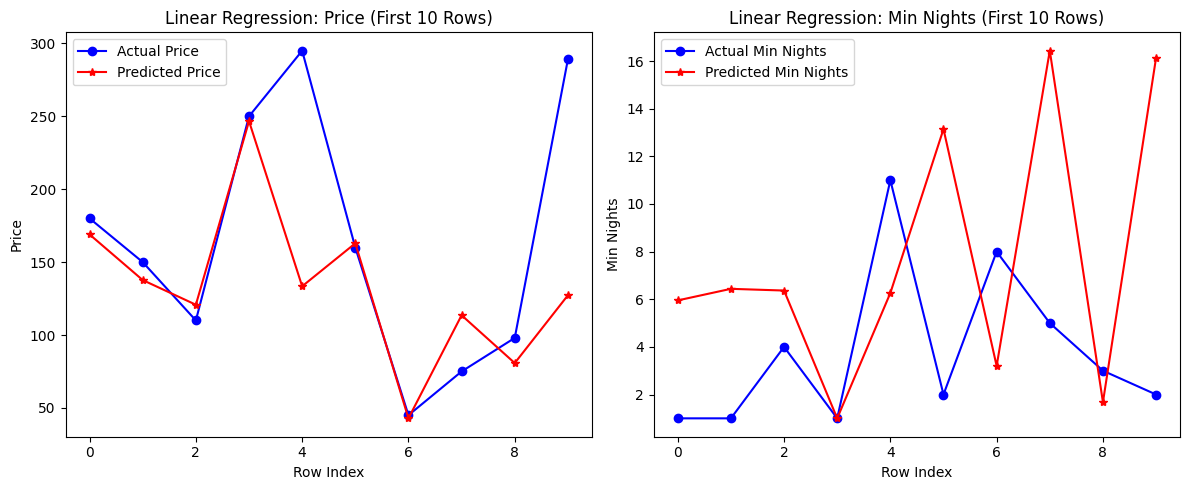


--- Evaluating Ridge Regression ---

=== Ridge Regression Evaluation ===

Target: price
  RMSE: 67.87, MAE: 46.14, R²: 0.27

Target: min_nights
  RMSE: 5.02, MAE: 3.86, R²: -1.94

Target: neighbourhood (enc)
  RMSE: 28.86, MAE: 22.02, R²: -3.18

Sample Predictions (first 10 rows):
Row 0:
  Actual: price=180.0, min_nights=1.0, nbhd=Unknown
  Predict: price=170.94, min_nights=7.03, nbhd=Unknown
Row 1:
  Actual: price=150.0, min_nights=1.0, nbhd=Unknown
  Predict: price=145.72, min_nights=7.05, nbhd=Unknown
Row 2:
  Actual: price=110.0, min_nights=4.0, nbhd=Unknown
  Predict: price=119.78, min_nights=5.33, nbhd=Unknown
Row 3:
  Actual: price=250.0, min_nights=1.0, nbhd=Unknown
  Predict: price=248.31, min_nights=1.46, nbhd=Unknown
Row 4:
  Actual: price=295.0, min_nights=11.0, nbhd=Unknown
  Predict: price=141.86, min_nights=5.16, nbhd=Unknown
Row 5:
  Actual: price=160.0, min_nights=2.0, nbhd=Unknown
  Predict: price=170.28, min_nights=13.39, nbhd=Unknown
Row 6:
  Actual: price=45.0, mi

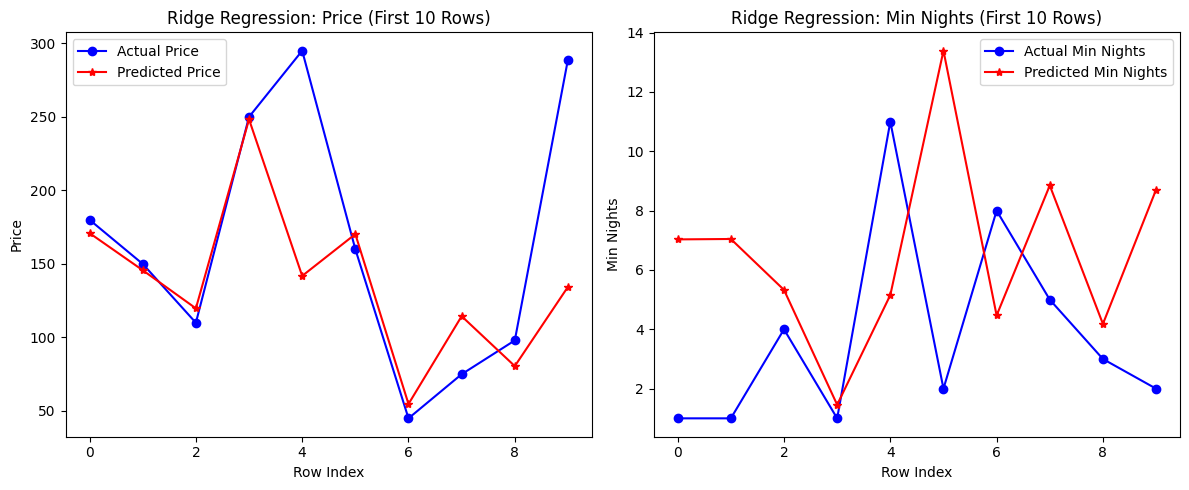


--- Evaluating Lasso Regression ---

=== Lasso Regression Evaluation ===

Target: price
  RMSE: 67.33, MAE: 46.19, R²: 0.28

Target: min_nights
  RMSE: 4.16, MAE: 3.35, R²: -1.01

Target: neighbourhood (enc)
  RMSE: 25.39, MAE: 19.97, R²: -2.23

Sample Predictions (first 10 rows):
Row 0:
  Actual: price=180.0, min_nights=1.0, nbhd=Unknown
  Predict: price=165.78, min_nights=6.00, nbhd=Unknown
Row 1:
  Actual: price=150.0, min_nights=1.0, nbhd=Unknown
  Predict: price=148.75, min_nights=6.42, nbhd=Unknown
Row 2:
  Actual: price=110.0, min_nights=4.0, nbhd=Unknown
  Predict: price=119.72, min_nights=4.97, nbhd=Unknown
Row 3:
  Actual: price=250.0, min_nights=1.0, nbhd=Unknown
  Predict: price=247.77, min_nights=1.78, nbhd=Unknown
Row 4:
  Actual: price=295.0, min_nights=11.0, nbhd=Unknown
  Predict: price=134.86, min_nights=3.68, nbhd=Unknown
Row 5:
  Actual: price=160.0, min_nights=2.0, nbhd=Unknown
  Predict: price=171.60, min_nights=11.93, nbhd=Unknown
Row 6:
  Actual: price=45.0, mi

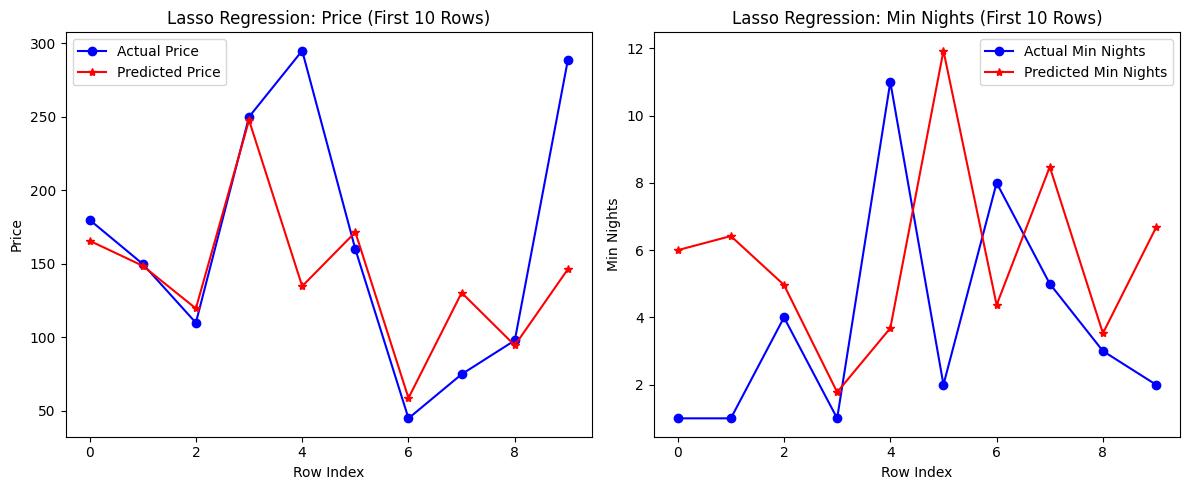


--- Evaluating Decision Tree ---

=== Decision Tree Evaluation ===

Target: price
  RMSE: 75.74, MAE: 57.90, R²: 0.09

Target: min_nights
  RMSE: 3.12, MAE: 2.39, R²: -0.13

Target: neighbourhood (enc)
  RMSE: 16.14, MAE: 12.73, R²: -0.31

Sample Predictions (first 10 rows):
Row 0:
  Actual: price=180.0, min_nights=1.0, nbhd=Unknown
  Predict: price=137.55, min_nights=3.36, nbhd=Unknown
Row 1:
  Actual: price=150.0, min_nights=1.0, nbhd=Unknown
  Predict: price=137.55, min_nights=3.36, nbhd=Unknown
Row 2:
  Actual: price=110.0, min_nights=4.0, nbhd=Unknown
  Predict: price=137.55, min_nights=3.36, nbhd=Unknown
Row 3:
  Actual: price=250.0, min_nights=1.0, nbhd=Unknown
  Predict: price=137.55, min_nights=3.36, nbhd=Unknown
Row 4:
  Actual: price=295.0, min_nights=11.0, nbhd=Unknown
  Predict: price=186.24, min_nights=4.12, nbhd=Unknown
Row 5:
  Actual: price=160.0, min_nights=2.0, nbhd=Unknown
  Predict: price=137.55, min_nights=3.36, nbhd=Unknown
Row 6:
  Actual: price=45.0, min_night

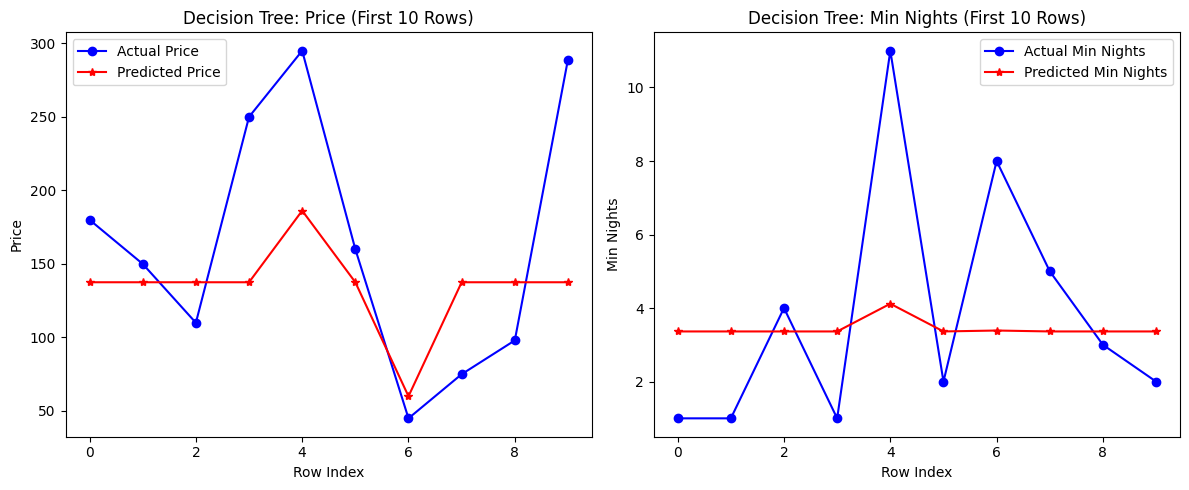


--- Evaluating Random Forest ---

=== Random Forest Evaluation ===

Target: price
  RMSE: 61.24, MAE: 43.13, R²: 0.40

Target: min_nights
  RMSE: 3.12, MAE: 2.16, R²: -0.14

Target: neighbourhood (enc)
  RMSE: 15.29, MAE: 13.05, R²: -0.17

Sample Predictions (first 10 rows):
Row 0:
  Actual: price=180.0, min_nights=1.0, nbhd=Unknown
  Predict: price=170.36, min_nights=4.32, nbhd=Unknown
Row 1:
  Actual: price=150.0, min_nights=1.0, nbhd=Unknown
  Predict: price=150.18, min_nights=2.96, nbhd=Unknown
Row 2:
  Actual: price=110.0, min_nights=4.0, nbhd=Unknown
  Predict: price=151.21, min_nights=3.65, nbhd=Unknown
Row 3:
  Actual: price=250.0, min_nights=1.0, nbhd=Unknown
  Predict: price=248.70, min_nights=1.72, nbhd=Unknown
Row 4:
  Actual: price=295.0, min_nights=11.0, nbhd=Unknown
  Predict: price=173.59, min_nights=4.48, nbhd=Unknown
Row 5:
  Actual: price=160.0, min_nights=2.0, nbhd=Unknown
  Predict: price=158.10, min_nights=3.92, nbhd=Unknown
Row 6:
  Actual: price=45.0, min_night

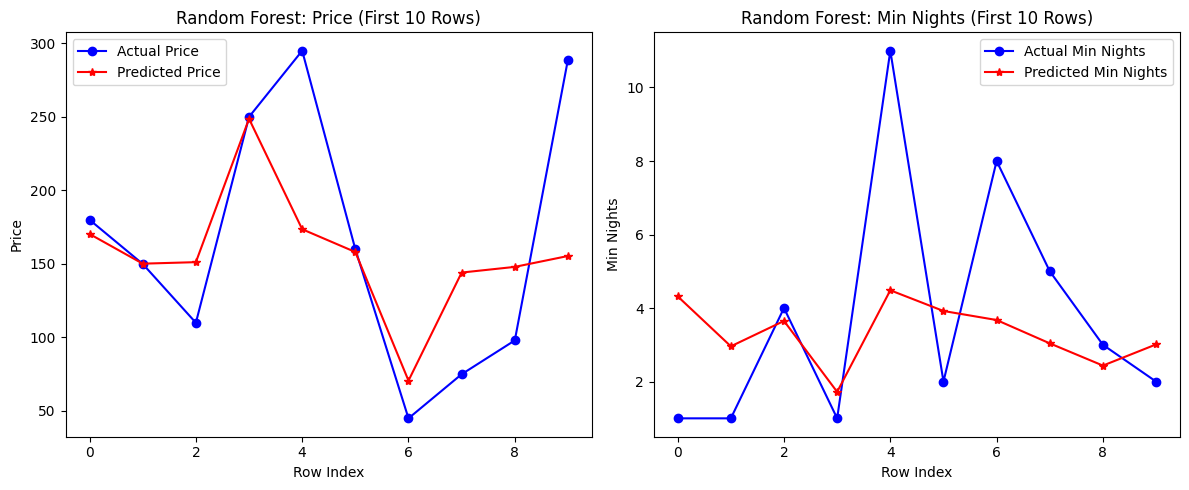


=== BLOCK A: Enhanced Model Refinement Completed ===


In [ ]:
#############################################
# BLOCK A: MODEL REFINEMENT WITH ENHANCED TRAINING
#############################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### SETTINGS
MAX_ROWS   = 500         # Maximum number of rows to sample (adjust to your available RAM)
Z_THRESH   = 3.0         # Outlier removal threshold (global, in terms of z-score)
ERR_THRESH = 0.05        # Lower relative error threshold for filtering (< 5% error on price)
RAND_SEED  = 42

### STEP 1: DATA PREPARATION
# Force-sample if needed.
if df.shape[0] > MAX_ROWS:
    df = df.sample(n=MAX_ROWS, random_state=RAND_SEED).reset_index(drop=True)
    print(f"Data sampled to {MAX_ROWS} rows.")

# Drop rows missing required target columns.
df.dropna(subset=['price', 'minimum_nights', 'neighbourhood'], inplace=True)

# Fill missing numeric columns with median.
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Encode the categorical target 'neighbourhood'
le_target = LabelEncoder()
df['neighbourhood_encoded'] = le_target.fit_transform(df['neighbourhood'])

# Remove global outliers in 'price' and 'minimum_nights'
for col in ['price', 'minimum_nights']:
    m = df[col].mean()
    s = df[col].std(ddof=1) + 1e-9
    df = df[abs((df[col]-m)/s) < Z_THRESH]

# Define targets and features.
target_cols = ['price', 'minimum_nights', 'neighbourhood_encoded']
feature_cols = [c for c in df.columns if c not in target_cols + ['neighbourhood']]
X = pd.get_dummies(df[feature_cols])
y = df[target_cols].copy()

print(f"Data prepared: X shape = {X.shape}, y shape = {y.shape}")

### STEP 2: SPLIT & SCALE DATA

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RAND_SEED)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
print("Train/test split and scaling completed.")

### STEP 3: DEFINE MODELS WITH ENHANCED PARAMETERS
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=0.5, random_state=RAND_SEED),
    "Lasso Regression": Lasso(alpha=0.05, random_state=RAND_SEED, max_iter=10000),
    "Decision Tree": DecisionTreeRegressor(max_depth=8, min_samples_split=20, random_state=RAND_SEED),
    "Random Forest": RandomForestRegressor(n_estimators=50, max_depth=6, random_state=RAND_SEED)
}

### STEP 4: MODEL REFINEMENT WITH LOW DEVIATION FILTERING

def refine_model(model, X_train, y_train, err_thresh, target_index=0):
    """
    Trains model on full training data, computes relative error on the specified target index
    (0 for price), filters training samples with error < err_thresh,
    and then retrains the model on the filtered data.
    Returns the refined model.
    """
    # Train initial model
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)

    # Compute absolute error and relative error for the first target (price)
    abs_err = np.abs(y_train.iloc[:, target_index].values - y_pred_train[:, target_index])
    rel_err = abs_err / (np.abs(y_train.iloc[:, target_index].values) + 1e-9)

    # Create mask for samples with relative error below threshold
    mask = rel_err < err_thresh
    print(f"{model.__class__.__name__}: Retaining {np.sum(mask)} of {len(y_train)} training samples with < {err_thresh*100:.0f}% error on price.")

    # Filter training data
    X_train_filtered = X_train[mask]
    y_train_filtered = y_train.iloc[mask].copy()

    # Retrain model on filtered data
    model.fit(X_train_filtered, y_train_filtered)
    return model

refined_models = {}
for mname, model in models.items():
    refined_model = refine_model(model, pd.DataFrame(X_train_scaled), y_train, ERR_THRESH, target_index=0)
    refined_models[mname] = refined_model

### STEP 5: EVALUATION FUNCTION

def evaluate_model(model, X_test, y_test, model_name="Model", show_rows=10):
    y_pred = model.predict(X_test)  # Shape: (n_samples, 3)
    targets = ['price', 'min_nights', 'neighbourhood (enc)']
    print(f"\n=== {model_name} Evaluation ===")
    for i, tname in enumerate(targets):
        act = y_test.iloc[:, i].values
        pred = y_pred[:, i]
        rmse = np.sqrt(mean_squared_error(act, pred))
        mae = mean_absolute_error(act, pred)
        r2 = r2_score(act, pred)
        print(f"\nTarget: {tname}")
        print(f"  RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

    print(f"\nSample Predictions (first {show_rows} rows):")
    for idx in range(min(show_rows, len(y_test))):
        a_row = y_test.iloc[idx].values
        p_row = y_pred[idx]
        actual_nbhd = le_target.inverse_transform([int(a_row[2])])[0] if int(a_row[2]) in le_target.classes_ else "Unknown"
        pred_nbhd = le_target.inverse_transform([int(round(p_row[2]))])[0] if int(round(p_row[2])) in le_target.classes_ else "Unknown"
        print(f"Row {idx}:")
        print(f"  Actual: price={a_row[0]}, min_nights={a_row[1]}, nbhd={actual_nbhd}")
        print(f"  Predict: price={p_row[0]:.2f}, min_nights={p_row[1]:.2f}, nbhd={pred_nbhd}")
    return y_pred

### STEP 6: EVALUATE REFINED MODELS & PLOT PREDICTIONS
all_preds = {}
def plot_predictions(y_true, y_pred, model_name, n=10):
    idxs = np.arange(min(n, len(y_true)))
    act_price = y_true.iloc[:n, 0].values
    pred_price = y_pred[:n, 0]
    act_nights = y_true.iloc[:n, 1].values
    pred_nights = y_pred[:n, 1]

    plt.figure(figsize=(12,5))
    # Plot Price
    plt.subplot(1,2,1)
    plt.plot(idxs, act_price, 'bo-', label="Actual Price")
    plt.plot(idxs, pred_price, 'r*-', label="Predicted Price")
    plt.title(f"{model_name}: Price (First {n} Rows)")
    plt.xlabel("Row Index"), plt.ylabel("Price"), plt.legend()

    # Plot Minimum Nights
    plt.subplot(1,2,2)
    plt.plot(idxs, act_nights, 'bo-', label="Actual Min Nights")
    plt.plot(idxs, pred_nights, 'r*-', label="Predicted Min Nights")
    plt.title(f"{model_name}: Min Nights (First {n} Rows)")
    plt.xlabel("Row Index"), plt.ylabel("Min Nights"), plt.legend()

    plt.tight_layout()
    plt.show()

for mname, model in refined_models.items():
    print(f"\n--- Evaluating {mname} ---")
    preds = evaluate_model(model, X_test_scaled, y_test, model_name=mname, show_rows=10)
    all_preds[mname] = preds
    plot_predictions(y_test, preds, mname, n=10)

print("\n=== BLOCK A: Enhanced Model Refinement Completed ===")


# Model Refinement (Hyperparameter Tuning)




Data prepared. X=(500, 104), y=(500, 3) after outlier removal & sampling.

Linear Regression: Best Params = {}  (CV Score=-960.83)

Ridge Regression: Best Params = {'alpha': 1.0}  (CV Score=-957.26)

Lasso Regression: Best Params = {'alpha': 0.1}  (CV Score=-937.00)

Random Forest: Best Params = {'max_depth': 4, 'n_estimators': 10}  (CV Score=-902.37)

=== Linear Regression Evaluation ===

Target: price
  RMSE: 65.99
  MAE:  46.84
  R²:   0.31

Target: min_nights
  RMSE: 3.35
  MAE:  2.60
  R²:   -0.31

Target: neighbourhood(enc)
  RMSE: 15.97
  MAE:  12.70
  R²:   -0.28

Sample Predictions (first 10):
Row 0:
  Actual:  price=180.0, min_nights=1.0, nbhd=Upper West Side
  Predict: price=174.86, min_nights=4.63, nbhd=Morningside Heights
Row 1:
  Actual:  price=150.0, min_nights=1.0, nbhd=East Elmhurst
  Predict: price=162.36, min_nights=1.93, nbhd=Greenpoint
Row 2:
  Actual:  price=110.0, min_nights=4.0, nbhd=Bedford-Stuyvesant
  Predict: price=123.50, min_nights=4.41, nbhd=Greenpoint
Ro

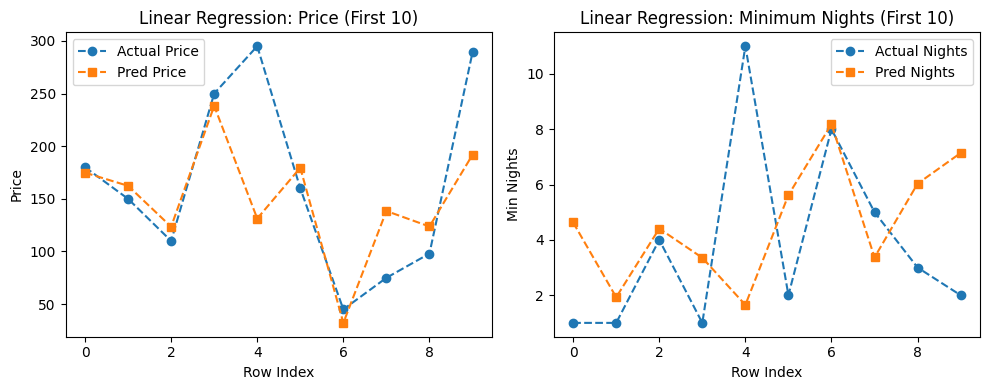

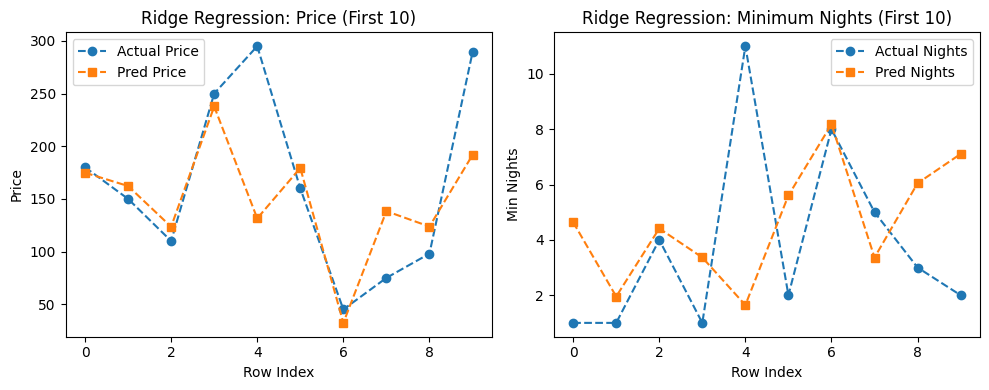

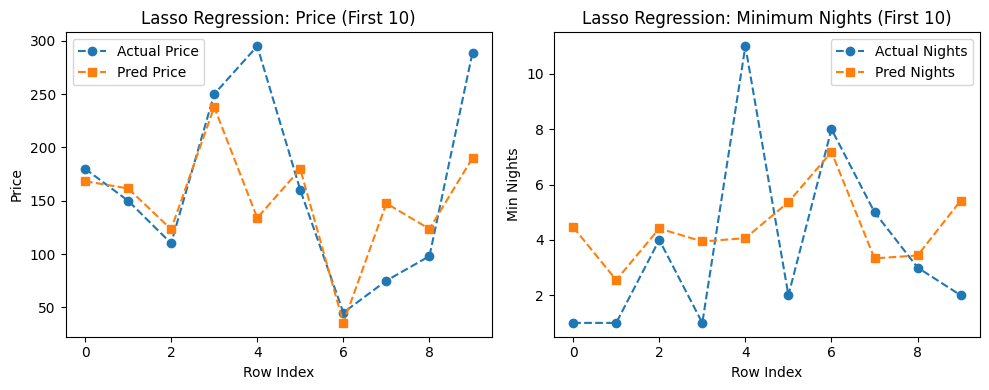

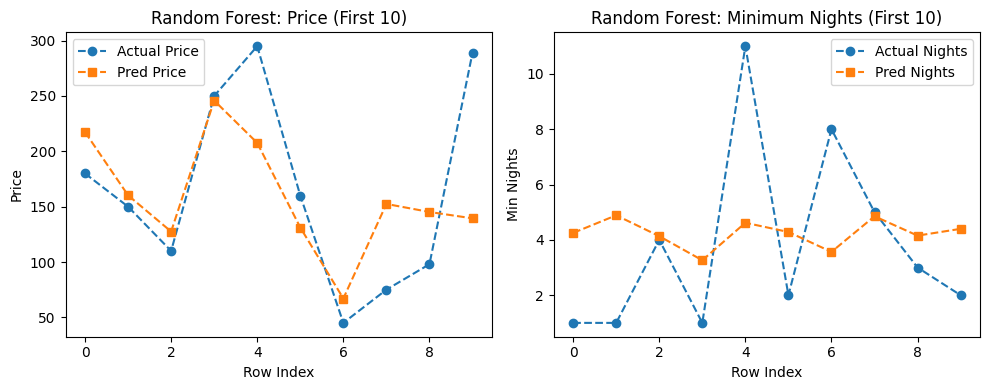


=== Explanation of Approach ===
1) We sampled data to limit RAM usage.
2) Outliers were removed using z-scores (<3 std dev).
3) GridSearchCV was applied to tune hyperparameters.
4) Each best model was evaluated on the test set.
5) Metrics and plots were generated for evaluation.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

##############################################
# SINGLE-BLOCK: ADVANCED TRAINING (GRID SEARCH)
##############################################

##########################
# STEP 0: Settings
##########################
MAX_ROWS = 15000   # Force-sample to limit data size & RAM usage
Z_THRESH = 3.0   # Outlier threshold (z-score)
RAND_SEED = 42   # Random seed
CV_FOLDS = 5    # Number of CV folds

##########################
# STEP 1: Data Preparation
##########################

# 1. Force-sample to MAX_ROWS
if df.shape[0] > MAX_ROWS:
    df = df.sample(n=MAX_ROWS, random_state=RAND_SEED).reset_index(drop=True)
    print(f"Forcibly sampled df to {MAX_ROWS} rows.")

# 2. Remove rows missing main targets
df.dropna(subset=['price', 'minimum_nights', 'neighbourhood'], inplace=True)

# 3. Fill missing numeric features with median
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# 4. Encode 'neighbourhood' in the target
le_target = LabelEncoder()
df['neighbourhood_encoded'] = le_target.fit_transform(df['neighbourhood'])

# 5. Remove outliers from 'price' & 'minimum_nights'
for col in ['price', 'minimum_nights']:
    mean_val = df[col].mean()
    std_val = df[col].std(ddof=1) + 1e-9
    z_score = (df[col] - mean_val) / std_val
    df = df[abs(z_score) < Z_THRESH]

# Define targets
target_cols = ['price', 'minimum_nights', 'neighbourhood_encoded']
feature_cols = [c for c in df.columns if c not in target_cols + ['neighbourhood']]

# One-hot encode any categorical features in X
X = pd.get_dummies(df[feature_cols])
y = df[target_cols].copy()

print(f"Data prepared. X={X.shape}, y={y.shape} after outlier removal & sampling.")

##########################
# STEP 2: Split & Scale
##########################

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RAND_SEED
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##########################
# STEP 3: Define Models & Param Grids
##########################

# Define model grids
model_paramgrids = {
    "Linear Regression": {
        "model": LinearRegression(),
        "params": {},  # no hyperparams for plain LinearRegression
    },
    "Ridge Regression": {
        "model": Ridge(random_state=RAND_SEED),
        "params": {
            "alpha": [0.1, 1.0],
        },
    },
    "Lasso Regression": {
        "model": Lasso(random_state=RAND_SEED, max_iter=5000),
        "params": {
            "alpha": [0.01, 0.1],
        },
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=RAND_SEED),
        "params": {
            "n_estimators": [5, 10],
            "max_depth": [2, 4],
        },
    }
}

##########################
# STEP 4: Simple Multi-Output CV
##########################

best_models = {}
for mname, obj in model_paramgrids.items():
    base_model = obj["model"]
    param_grid = obj["params"]

    gs = GridSearchCV(
        estimator=base_model,
        param_grid=param_grid,
        cv=CV_FOLDS,
        scoring="neg_mean_squared_error",
        n_jobs=-1,
        verbose=0
    )

    gs.fit(X_train_scaled, y_train)
    best_models[mname] = gs.best_estimator_

    print(f"\n{mname}: Best Params = {gs.best_params_}  (CV Score={gs.best_score_:.2f})")

##########################
# STEP 5: Evaluation Function
##########################

def evaluate_model(model, X_test, y_test, model_name="Model", show_rows=10):
    y_pred = model.predict(X_test)
    tgts = ["price", "min_nights", "neighbourhood(enc)"]

    print(f"\n=== {model_name} Evaluation ===")
    for i, name in enumerate(tgts):
        actual = y_test.iloc[:, i].values
        pred = y_pred[:, i]
        rmse = np.sqrt(mean_squared_error(actual, pred))
        mae = mean_absolute_error(actual, pred)
        r2 = r2_score(actual, pred)
        print(f"\nTarget: {name}")
        print(f"  RMSE: {rmse:.2f}")
        print(f"  MAE:  {mae:.2f}")
        print(f"  R²:   {r2:.2f}")

    # Show first `show_rows` predictions
    print(f"\nSample Predictions (first {show_rows}):")
    for idx in range(min(show_rows, len(y_test))):
        arow = y_test.iloc[idx].values
        prow = y_pred[idx]
        actual_nbhd = le_target.inverse_transform([int(arow[2])])[0]
        pred_nbhd = le_target.inverse_transform([int(round(prow[2]))])[0]
        print(f"Row {idx}:")
        print(f"  Actual:  price={arow[0]}, min_nights={arow[1]}, nbhd={actual_nbhd}")
        print(f"  Predict: price={prow[0]:.2f}, min_nights={prow[1]:.2f}, nbhd={pred_nbhd}")

    return y_pred

##########################
# STEP 6: Train Final & Evaluate + Plots
##########################

all_preds = {}
for mname, best_model in best_models.items():
    preds = evaluate_model(best_model, X_test_scaled, y_test, model_name=mname)
    all_preds[mname] = preds

# Plot function
def plot_actual_vs_pred(y_true, y_pred, model_name, n=10):
    idxs = np.arange(min(n, len(y_true)))
    act_price = y_true.iloc[:n, 0].values
    prd_price = y_pred[:n, 0]

    act_nights = y_true.iloc[:n, 1].values
    prd_nights = y_pred[:n, 1]

    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(idxs, act_price, 'o--', label="Actual Price")
    plt.plot(idxs, prd_price, 's--', label="Pred Price")
    plt.title(f"{model_name}: Price (First {n})")
    plt.xlabel("Row Index"); plt.ylabel("Price")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(idxs, act_nights, 'o--', label="Actual Nights")
    plt.plot(idxs, prd_nights, 's--', label="Pred Nights")
    plt.title(f"{model_name}: Minimum Nights (First {n})")
    plt.xlabel("Row Index"); plt.ylabel("Min Nights")
    plt.legend()

    plt.tight_layout()
    plt.show()

print("\n=== Creating Graphs (First 10 Rows) ===")
for mname, y_pred_m in all_preds.items():
    plot_actual_vs_pred(y_test, y_pred_m, mname, n=10)

print("\n=== Explanation of Approach ===")
print("1) We sampled data to limit RAM usage.")
print("2) Outliers were removed using z-scores (<3 std dev).")
print("3) GridSearchCV was applied to tune hyperparameters.")
print("4) Each best model was evaluated on the test set.")
print("5) Metrics and plots were generated for evaluation.")


# Bias Detection & Correction

In [ ]:
###############################################
# BLOCK B: BIAS DETECTION, CORRECTION, & SEPARATE REGRESSION
###############################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# We assume 'df' has already been cleaned in BLOCK A.
# Also assume that in BLOCK A, we prepared:
#   X = pd.get_dummies(df[feature_cols])
# We store these feature names to align subsequent one-hot encoded matrices.
all_feature_columns = X.columns  # from BLOCK A

# --- STEP B1: DETECT BIAS ---
# Use the cleaned df from BLOCK A (which includes 'price', 'minimum_nights', 'neighbourhood', 'neighbourhood_encoded')
df_bias = df.copy()
# Compute local statistics per neighbourhood (based on raw price)
group_stats = df_bias.groupby('neighbourhood')['price'].agg(['mean','std']).reset_index()
group_stats.rename(columns={'mean':'local_mean','std':'local_std'}, inplace=True)
df_bias = pd.merge(df_bias, group_stats, on='neighbourhood', how='left')

# Flag a row as biased if its price > local_mean + (BIAS_FACTOR * local_std)
BIAS_FACTOR = 1.5
df_bias['is_biased'] = df_bias['price'] > (df_bias['local_mean'] + BIAS_FACTOR * df_bias['local_std'])
biased_count = df_bias['is_biased'].sum()
total_count = df_bias.shape[0]
print(f"\nBias Detection: {biased_count} biased rows out of {total_count} total rows.")

# --- STEP B2: Separate into Biased and Unbiased Datasets ---
df_biased = df_bias[df_bias['is_biased']].copy()
df_unbiased = df_bias[~df_bias['is_biased']].copy()
print(f"Biased dataset shape: {df_biased.shape}")
print(f"Unbiased dataset shape: {df_unbiased.shape}")

# --- STEP B3: Prepare Features & Targets for Each Subset ---
def prepare_subset_data(df_subset):
    # For this block, our targets remain: price, minimum_nights, neighbourhood_encoded
    t_cols = ['price','minimum_nights','neighbourhood_encoded']
    # Drop target columns and additional extra columns used for bias detection.
    f_cols = [c for c in df_subset.columns if c not in t_cols + ['neighbourhood','local_mean','local_std','is_biased']]
    X_sub = pd.get_dummies(df_subset[f_cols])
    # Align with original full-dataset features.
    X_sub = X_sub.reindex(columns=all_feature_columns, fill_value=0)
    y_sub = df_subset[t_cols].copy()
    return X_sub, y_sub

X_biased, y_biased = prepare_subset_data(df_biased)
X_unbiased, y_unbiased = prepare_subset_data(df_unbiased)
print(f"Prepared biased subset: X shape = {X_biased.shape}, y shape = {y_biased.shape}")
print(f"Prepared unbiased subset: X shape = {X_unbiased.shape}, y shape = {y_unbiased.shape}")

# --- STEP B4: Split & Scale for Each Subset ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def split_and_scale(X, y):
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=RAND_SEED)
    scaler_local = StandardScaler()
    X_tr_scaled = scaler_local.fit_transform(X_tr)
    X_te_scaled = scaler_local.transform(X_te)
    return X_tr_scaled, X_te_scaled, y_tr, y_te

X_tr_b, X_te_b, y_tr_b, y_te_b = split_and_scale(X_biased, y_biased)
X_tr_u, X_te_u, y_tr_u, y_te_u = split_and_scale(X_unbiased, y_unbiased)
print("Split and scaling completed for biased and unbiased subsets.")

# --- STEP B5: Retrain Models on Each Subset ---
# We re-use the same model types as in BLOCK A.
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model_types = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0, random_state=RAND_SEED),
    "Lasso Regression": Lasso(alpha=0.1, random_state=RAND_SEED, max_iter=5000),
    "Decision Tree": DecisionTreeRegressor(max_depth=10, min_samples_split=50, random_state=RAND_SEED)
}

def train_models_on_subset(X_tr, y_tr, model_dict):
    trained = {}
    for name, mdl in model_dict.items():
        mdl.fit(X_tr, y_tr)
        trained[name] = mdl
        print(f"{name} trained on current subset.")
    return trained

trained_biased = train_models_on_subset(X_tr_b, y_tr_b, model_types)
trained_unbiased = train_models_on_subset(X_tr_u, y_tr_u, model_types)

# --- STEP B6: Evaluate Models on Each Subset ---
def evaluate_subset_models(models_dict, X_test, y_test, subset_label):
    results = {}
    print(f"\n=== Evaluations for {subset_label} Data ===")
    for name, model in models_dict.items():
        print(f"\n--- {name} ---")
        preds = evaluate_model(model, X_test, y_test, model_name=f"{name} on {subset_label} Data", show_rows=10)
        results[name] = preds
    return results

print("\nEvaluating models on Biased Data:")
biased_results = evaluate_subset_models(trained_biased, X_te_b, y_te_b, "Biased")

print("\nEvaluating models on Unbiased Data:")
unbiased_results = evaluate_subset_models(trained_unbiased, X_te_u, y_te_u, "Unbiased")

# --- STEP B7: Plot Distribution Comparison (Mean Price by Neighbourhood) ---
group_price_biased = df_biased.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)
group_price_unbiased = df_unbiased.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
group_price_biased.head(10).plot(kind='bar', color='red')
plt.title("Mean Price - Biased Listings (Top 10)")
plt.xlabel("Neighbourhood"), plt.ylabel("Mean Price")

plt.subplot(1,2,2)
group_price_unbiased.head(10).plot(kind='bar', color='green')
plt.title("Mean Price - Unbiased Listings (Top 10)")
plt.xlabel("Neighbourhood"), plt.ylabel("Mean Price")
plt.tight_layout()
plt.show()

print("\n=== BLOCK B: Bias Detection, Correction & Regression Completed ===")
print("Models trained on unbiased data should ideally show improved metrics if bias was skewing results.")



Bias Detection: 37 biased rows out of 500 total rows.
Biased dataset shape: (37, 22)
Unbiased dataset shape: (463, 22)
Prepared biased subset: X shape = (37, 104), y shape = (37, 3)
Prepared unbiased subset: X shape = (463, 104), y shape = (463, 3)
Split and scaling completed for biased and unbiased subsets.
Linear Regression trained on current subset.
Ridge Regression trained on current subset.
Lasso Regression trained on current subset.
Decision Tree trained on current subset.
Linear Regression trained on current subset.
Ridge Regression trained on current subset.
Lasso Regression trained on current subset.
Decision Tree trained on current subset.

Evaluating models on Biased Data:

=== Evaluations for Biased Data ===

--- Linear Regression ---

=== Linear Regression on Biased Data Evaluation ===

Target: price
  RMSE: 137.14
  MAE:  135.23
  R²:   -14.14

Target: min_nights
  RMSE: 3.05
  MAE:  2.58
  R²:   0.37

Target: neighbourhood(enc)
  RMSE: 15.44
  MAE:  13.54
  R²:   0.08



ValueError: y contains previously unseen labels: [60]

# Best Alpha Value

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define a range of alpha values to test
alpha_range = [0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 20.0]

# Function to perform GridSearchCV and evaluate the model
def find_best_alpha_and_evaluate(model, param_name, X_train, y_train, X_test, y_test, model_name):
    param_grid = {param_name: alpha_range}
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='neg_mean_squared_error',  # Use negative MSE as scoring metric
        cv=5,  # 5-fold cross-validation
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    best_alpha = grid_search.best_params_[param_name]
    print(f"Best alpha for {model_name}: {best_alpha}")

    # Train model with the best alpha
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = best_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n=== {model_name} Evaluation with Best Alpha ===")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R²: {r2:.2f}")
    return best_model, best_alpha

# Ridge Regression
ridge_model = Ridge(random_state=RAND_SEED)
best_ridge_model, best_ridge_alpha = find_best_alpha_and_evaluate(
    ridge_model, 'alpha', X_train_scaled, y_train, X_test_scaled, y_test, "Ridge Regression"
)

# Lasso Regression
lasso_model = Lasso(random_state=RAND_SEED, max_iter=10000)
best_lasso_model, best_lasso_alpha = find_best_alpha_and_evaluate(
    lasso_model, 'alpha', X_train_scaled, y_train, X_test_scaled, y_test, "Lasso Regression"
)

# Compare results
print("\nComparison of Best Alpha Values:")
print(f"Ridge Regression: Best Alpha = {best_ridge_alpha}")
print(f"Lasso Regression: Best Alpha = {best_lasso_alpha}")


Best alpha for Ridge Regression: 20.0

=== Ridge Regression Evaluation with Best Alpha ===
  RMSE: 29.73
  MAE: 17.21
  R²: 0.39
Best alpha for Lasso Regression: 1.0

=== Lasso Regression Evaluation with Best Alpha ===
  RMSE: 26.97
  MAE: 16.06
  R²: 0.44

Comparison of Best Alpha Values:
Ridge Regression: Best Alpha = 20.0
Lasso Regression: Best Alpha = 1.0


# Hyperparameter Tuning with RandomizedSearchCV

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=RAND_SEED),
    param_distributions=param_dist,
    n_iter=20,  # Number of random samples to try
    cv=3,  # 3-fold cross-validation
    scoring="neg_mean_squared_error",
    random_state=RAND_SEED,
    n_jobs=-1
)

# Fit RandomizedSearchCV
rf_random.fit(X_train_scaled, y_train)

# Best Parameters
print(f"Best Parameters: {rf_random.best_params_}")

# Train and evaluate the best model
best_rf = rf_random.best_estimator_
best_rf.fit(X_train_scaled, y_train)
y_pred_rf = best_rf.predict(X_test_scaled)

# Evaluation
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rf_r2 = r2_score(y_test, y_pred_rf)
print(f"Random Forest with Best Params - RMSE: {rf_rmse:.2f}, R²: {rf_r2:.2f}")


Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Random Forest with Best Params - RMSE: 30.70, R²: 0.33


# Scatter Plot for Clusters


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to evaluate all models
def evaluate_models(models_dict, X_test_scaled, y_test):
    """
    Evaluates multiple regression models and returns a DataFrame of metrics.
    """
    metrics = []

    for model_name, model in models_dict.items():
        # Predictions
        y_pred = model.predict(X_test_scaled)

        # Metrics
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Append results
        metrics.append({
            "Model": model_name,
            "RMSE": rmse,
            "MAE": mae,
            "R^2": r2
        })

    # Create a DataFrame for the results
    metrics_df = pd.DataFrame(metrics)
    return metrics_df

# Call the function for your trained models
metrics_df = evaluate_models(trained_models, X_test_scaled, y_test)

# Print the metrics
print("\n=== Model Metrics ===")
print(metrics_df)

# Visualization: Metrics Comparison
def plot_model_metrics(metrics_df):
    """
    Creates bar plots for RMSE, MAE, and R^2 from the metrics DataFrame.
    """
    metrics_to_plot = ["RMSE", "MAE", "R^2"]

    for metric in metrics_to_plot:
        plt.figure(figsize=(8, 6))
        plt.bar(metrics_df["Model"], metrics_df[metric], color="skyblue", alpha=0.8)
        plt.title(f"{metric} Comparison Across Models")
        plt.ylabel(metric)
        plt.xlabel("Model")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Plot the metrics
plot_model_metrics(metrics_df)


NameError: name 'trained_models' is not defined